In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

# Data Preprocessing for IBM HR Analytics Employee Attrition & Performance

## Data Profiling


- Age: Umur Karyawan
- Attrition: Karyawan Attrition (Keluar)
- BusinessTravel: Frekuensi Travel Karyawan
- DailyRate: Rate Harian
- Department: Divisi/Bidang pekerjaan
- DistanceFromHome: Jarak Rumah
- Education: Pendidikan (tahun)
- EducationField: Bidang Pendidikan
- EmployeeCount: Jumlah Karyawan
- EmployeeNumber: ID Karyawan
- Environment Satisfaction: Kepuasan Karyawan terhadap Lingkungan Kerja
- Gender: Jenis Kelamin
- HourlyRate: Rate per jam
- JobInvolvement: Keterlibatan Kerja
- JobLevel: Tingkat Pekerjaan
- JobRole: Jabatan/Peran
- JobSatisfaction: Kepuasan Karyawan terhadap Pekerjaan
- MaritalStatus: Status Pernikahan
- MonthlyIncome: Gaji per bulan
- MonthlyRate: Rate bulanan
- NumCompaniesWork: Pernah berkerja diberapa perusahaan
- Over18: Diatas 18 tahun
- Overtime: Ketersediaan Lembur
- PercentSalaryHike: Kenaikan gaji dalam persen
- PerformanceRating: Rating Kinerja
- RelationshipSatisfaction: Kepuasan terhadap Hubungan
- StandardHours: Jam berkerja
- StockOptionLevel: Pengalaman terhadap perdagangan saham (tahun)
- TotalWorkingYears: Pengalaman berkerja (tahun)
- TrainingTimeLastYear: Masa Training Tahun Lalu
- WorkLifeBalance: Keseimbangan pekerjaan dan kehidupan pribadi
- YearsAtCompany: Lama bekerja di perusahaan (tahun)
- YearsInCurrentRole: Lama bekerja di jabatan sekarang (tahun)
- YearsSinceLastPromotion: Lama terakhir promosi (tahun)
- YearsWithCurrManager: Lama bekerja dengan manager sekarang (tahun)


## Load Dataset

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Initial Data Inspection

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
print(df.shape)

(1470, 35)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
print(df.describe(include='all'))

                Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Developm

## Reformating Data

In [ ]:
df['BusinessTravel'] = df['BusinessTravel'].replace({
    'Travel_Rarely': 'Rarely',
    'Travel_Frequently': 'Frequently',
    'Non-Travel': 'None'
})

## Handling Missing Values

In [ ]:
# Cek missing values
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


## Handling Duplicates

In [ ]:
# Cek duplicate rows
print(df.duplicated().sum())

# Menghapus duplicates
df = df.drop_duplicates()

0


## Columns to Drop (No Predictive Value)

In [ ]:
columns_to_drop = [
    'EmployeeCount',
    'StandardHours',
    'Over18',
    'EmployeeNumber',
]
df = df.drop(columns=columns_to_drop)

Menghapus kolom yang tidak berpengaruh terhadap proses penghitungan model
- EmployeeCount : karena jumlah karyawan semua nilainya 1 atau tidak bervariasi
- StandardHours : karena jam bekerja setiap karyawan semua nilainya 80 atau tidak bervariasi
- Over18 : karena semua karyawan usianya diatas 18 atau nilainya tidak bervariasi
- EmployeeNumber : karena hanya sebagai ID atau identitas dari setiap karyawan sehingga tidak memiliki pengaruh terhadap proses model

## Numerical and Categorical

In [ ]:
# Pilih kolom dengan tipe data numerik saja
nums = df.select_dtypes(['float64', 'int64']).columns

# Pilih kolom dengan tipe data kategorik saja
cats = df.select_dtypes(['object']).columns

## View Statistical Summary

In [ ]:
from IPython.display import display, HTML

def describe_categorical(df, cols):
    return df[cols].astype('category').describe()

In [ ]:
display(HTML('<center><b><h3>Statistics Description of Dataset</h3></b></center><center><b><h5>Numerical Features</h5></b></center>'))
display(df[nums].describe())

display(HTML('<center><b><h3>Statistics Description of Dataset</h3></b></center><center><b><h5>Categorical Features</h5></b></center>'))
describe_categorical(df, cats)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


## Univariate Analysis

### Outlier Data Numerikal (Boxplot)

Text(0.5, 1.0, 'Outlier Age')

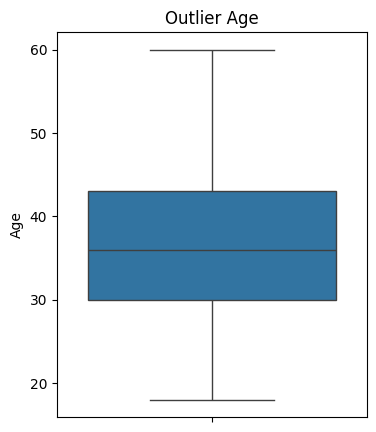

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['Age'])
plt.title('Outlier Age')

Text(0.5, 1.0, 'Outlier DailyRate')

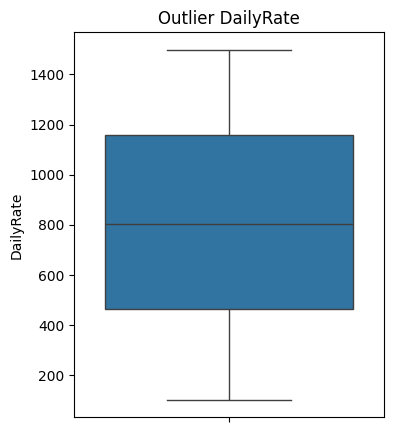

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['DailyRate'])
plt.title('Outlier DailyRate')

Text(0.5, 1.0, 'Outlier DistanceFromHome')

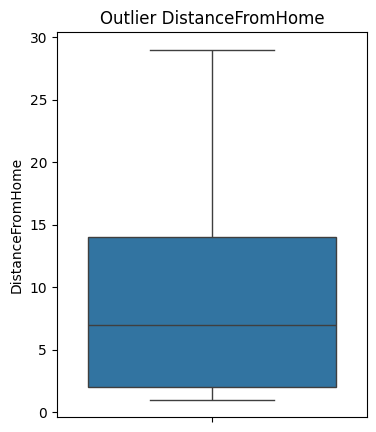

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['DistanceFromHome'])
plt.title('Outlier DistanceFromHome')

Text(0.5, 1.0, 'Outlier Education')

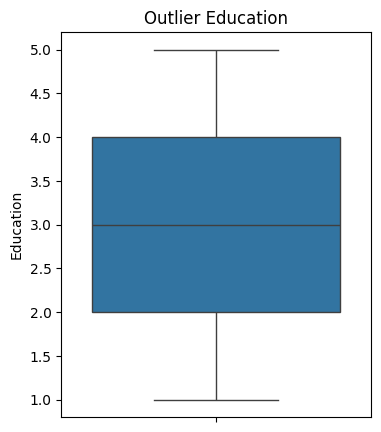

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['Education'])
plt.title('Outlier Education')

Text(0.5, 1.0, 'Outlier EnvironmentSatisfaction')

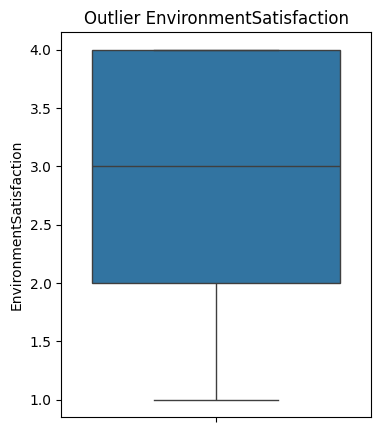

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['EnvironmentSatisfaction'])
plt.title('Outlier EnvironmentSatisfaction')

Text(0.5, 1.0, 'Outlier HourlyRate')

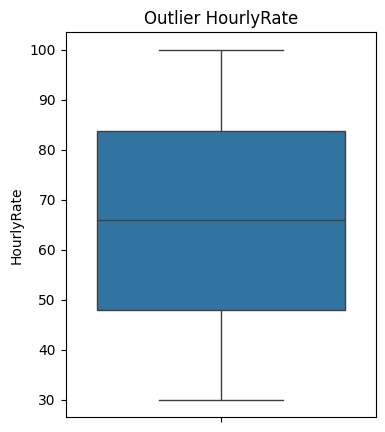

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['HourlyRate'])
plt.title('Outlier HourlyRate')

Text(0.5, 1.0, 'Outlier JobInvolvement')

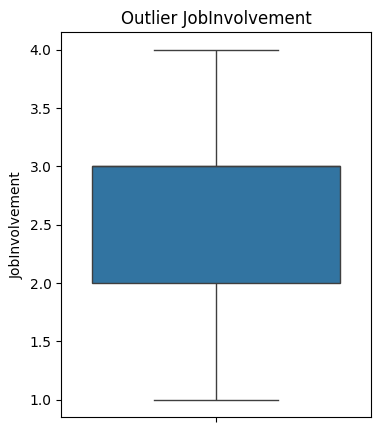

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['JobInvolvement'])
plt.title('Outlier JobInvolvement')

Text(0.5, 1.0, 'Outlier JobLevel')

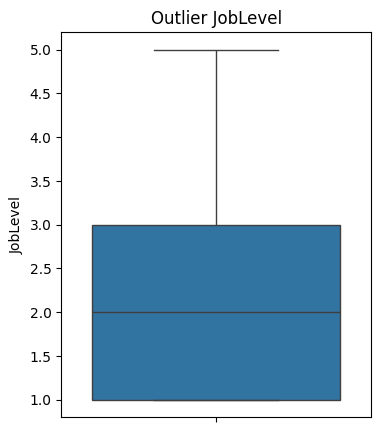

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['JobLevel'])
plt.title('Outlier JobLevel')

Text(0.5, 1.0, 'Outlier JobSatisfaction')

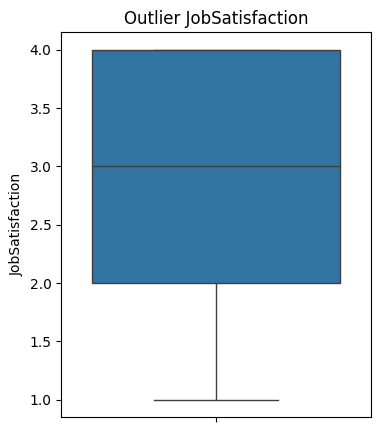

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['JobSatisfaction'])
plt.title('Outlier JobSatisfaction')

Text(0.5, 1.0, 'Outlier MonthlyIncome')

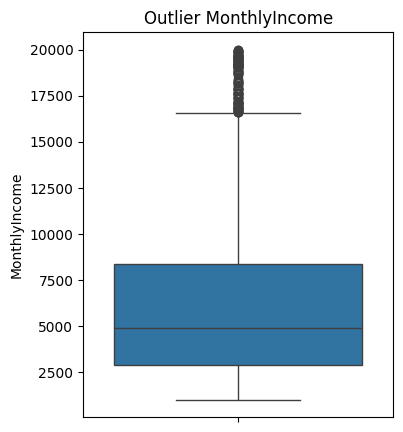

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['MonthlyIncome'])
plt.title('Outlier MonthlyIncome')

Text(0.5, 1.0, 'Outlier MonthlyRate')

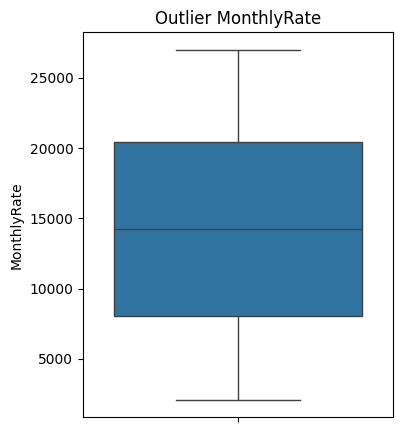

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['MonthlyRate'])
plt.title('Outlier MonthlyRate')

Text(0.5, 1.0, 'Outlier NumCompaniesWorked')

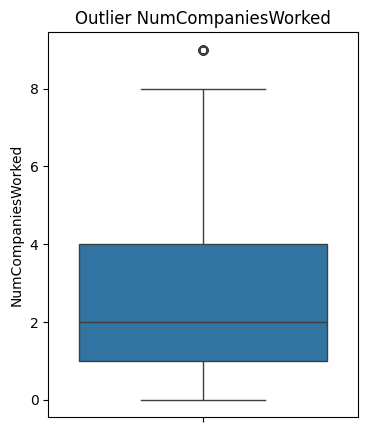

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['NumCompaniesWorked'])
plt.title('Outlier NumCompaniesWorked')

Text(0.5, 1.0, 'Outlier PercentSalaryHike')

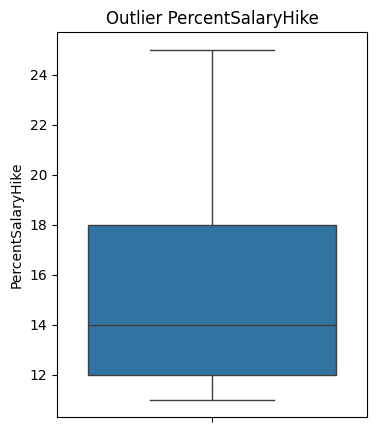

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['PercentSalaryHike'])
plt.title('Outlier PercentSalaryHike')

Text(0.5, 1.0, 'Outlier PerformanceRating')

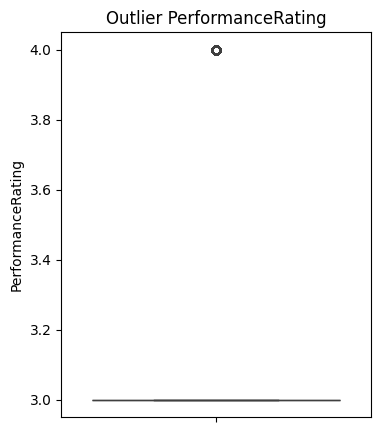

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['PerformanceRating'])
plt.title('Outlier PerformanceRating')

Text(0.5, 1.0, 'Outlier RelationshipSatisfaction')

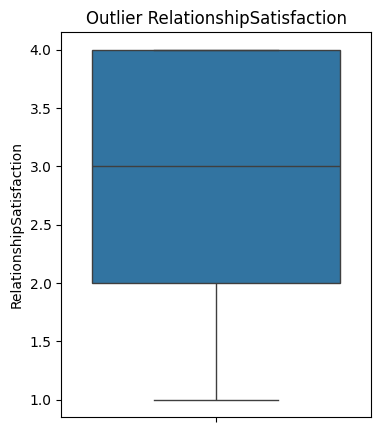

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['RelationshipSatisfaction'])
plt.title('Outlier RelationshipSatisfaction')

Text(0.5, 1.0, 'Outlier StockOptionLevel')

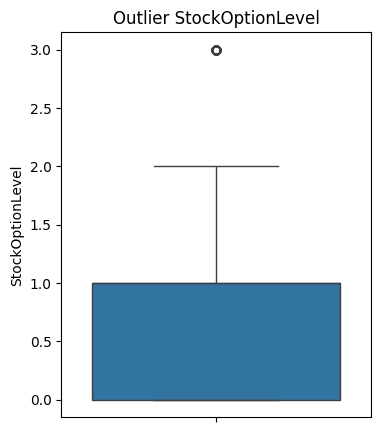

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['StockOptionLevel'])
plt.title('Outlier StockOptionLevel')

Text(0.5, 1.0, 'Outlier TotalWorkingYears')

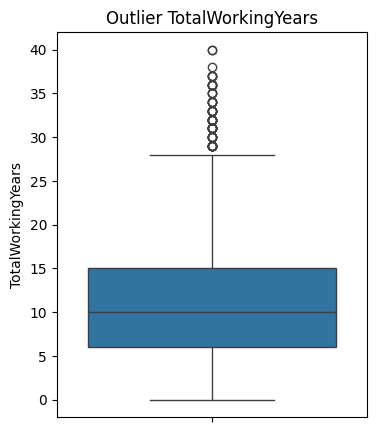

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['TotalWorkingYears'])
plt.title('Outlier TotalWorkingYears')

Text(0.5, 1.0, 'Outlier TrainingTimesLastYear')

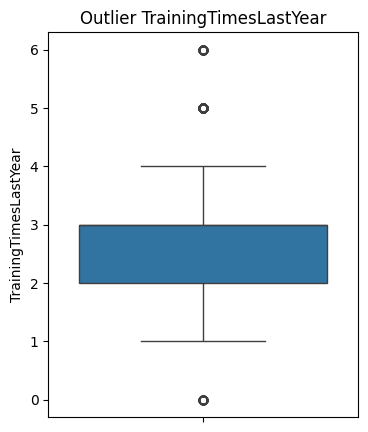

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['TrainingTimesLastYear'])
plt.title('Outlier TrainingTimesLastYear')

Text(0.5, 1.0, 'Outlier WorkLifeBalance')

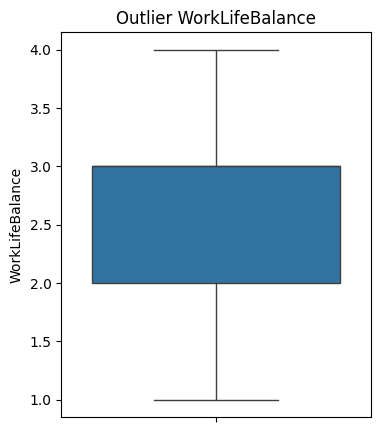

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['WorkLifeBalance'])
plt.title('Outlier WorkLifeBalance')

Text(0.5, 1.0, 'Outlier YearsAtCompany')

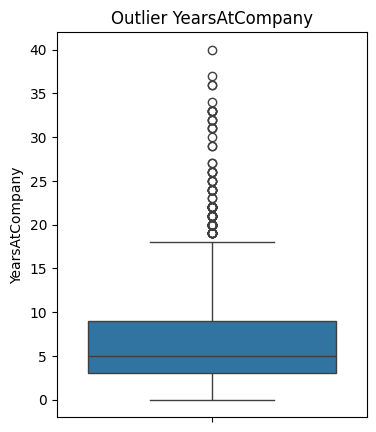

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['YearsAtCompany'])
plt.title('Outlier YearsAtCompany')

Text(0.5, 1.0, 'Outlier YearsInCurrentRole')

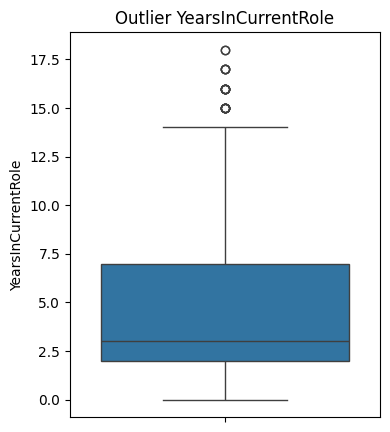

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['YearsInCurrentRole'])
plt.title('Outlier YearsInCurrentRole')

Text(0.5, 1.0, 'Outlier YearsSinceLastPromotion')

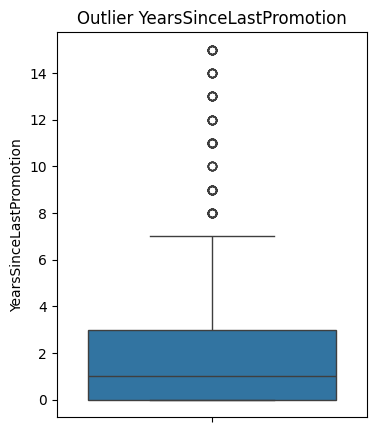

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['YearsSinceLastPromotion'])
plt.title('Outlier YearsSinceLastPromotion')

Text(0.5, 1.0, 'Outlier YearsWithCurrManager')

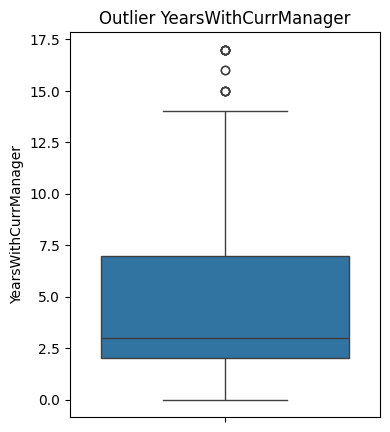

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['YearsWithCurrManager'])
plt.title('Outlier YearsWithCurrManager')

### Data Distribution

Text(0.5, 1.0, 'Distribusi Age')

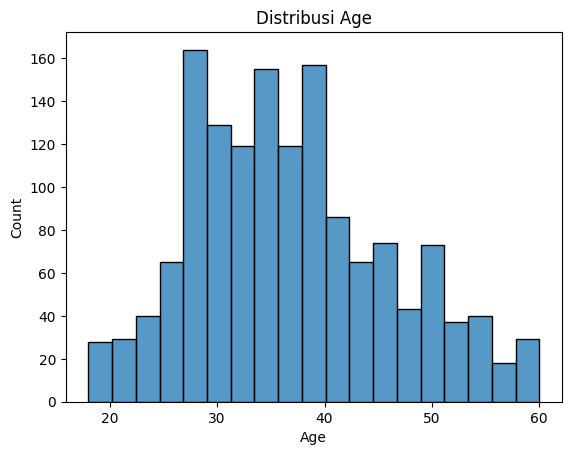

In [ ]:
sns.histplot(data=df, x='Age')
plt.title('Distribusi Age')

Text(0.5, 1.0, 'Distribusi DailyRate')

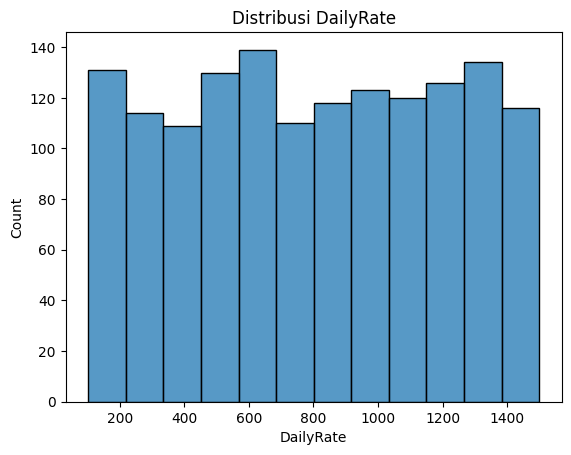

In [ ]:
sns.histplot(data=df, x='DailyRate')
plt.title('Distribusi DailyRate')

Text(0.5, 1.0, 'Distribusi DistanceFromHome')

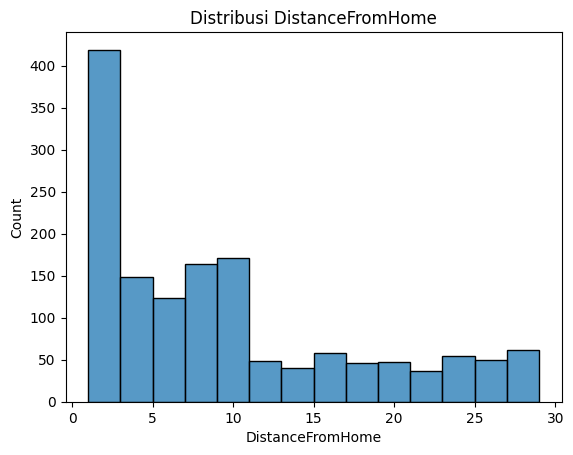

In [ ]:
sns.histplot(data=df, x='DistanceFromHome')
plt.title('Distribusi DistanceFromHome')

Text(0.5, 1.0, 'Distribusi Education')

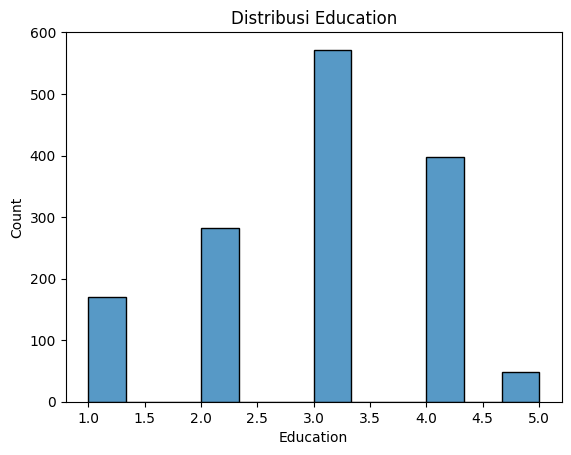

In [ ]:
sns.histplot(data=df, x='Education')
plt.title('Distribusi Education')

Text(0.5, 1.0, 'Distribusi EnvironmentSatisfaction')

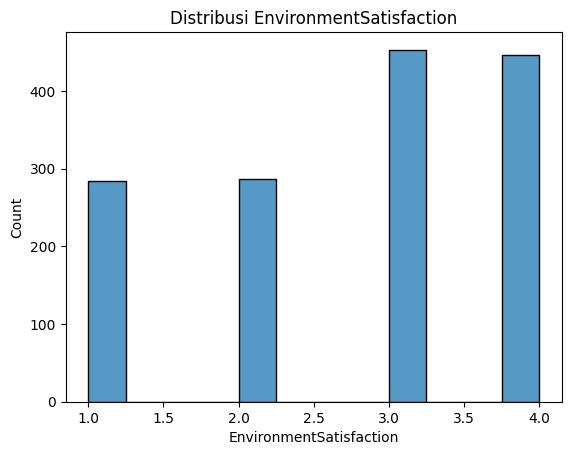

In [ ]:
sns.histplot(data=df, x='EnvironmentSatisfaction')
plt.title('Distribusi EnvironmentSatisfaction')

Text(0.5, 1.0, 'Distribusi HourlyRate')

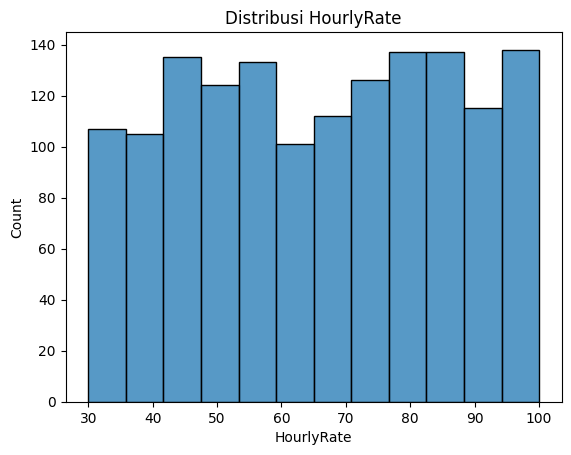

In [ ]:
sns.histplot(data=df, x='HourlyRate')
plt.title('Distribusi HourlyRate')

Text(0.5, 1.0, 'Distribusi JobInvolvement')

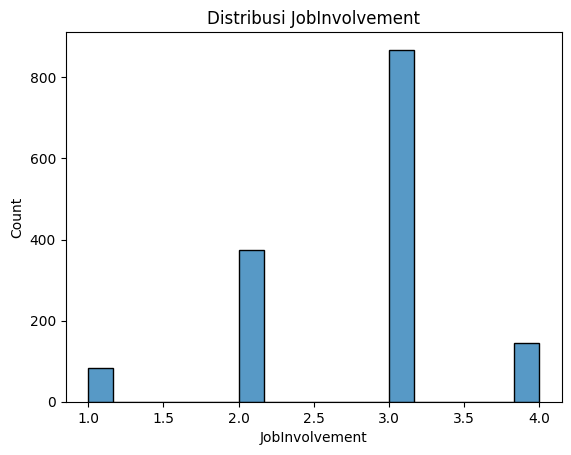

In [ ]:
sns.histplot(data=df, x='JobInvolvement')
plt.title('Distribusi JobInvolvement')

Text(0.5, 1.0, 'Distribusi JobLevel')

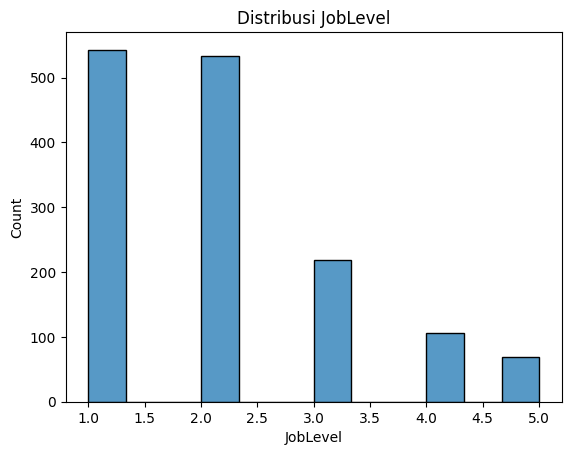

In [ ]:
sns.histplot(data=df, x='JobLevel')
plt.title('Distribusi JobLevel')

Text(0.5, 1.0, 'Distribusi JobSatisfaction')

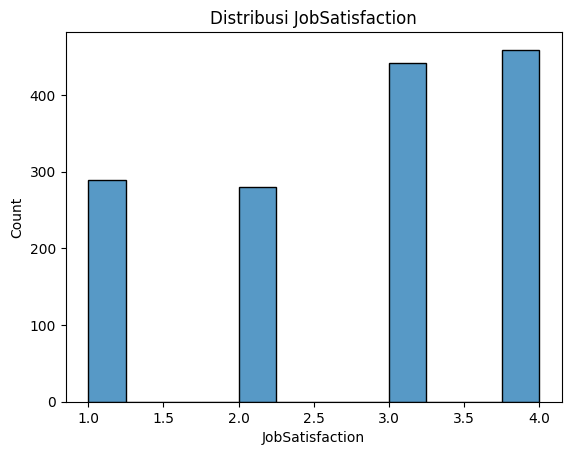

In [ ]:
sns.histplot(data=df, x='JobSatisfaction')
plt.title('Distribusi JobSatisfaction')

Text(0.5, 1.0, 'Distribusi MonthlyIncome')

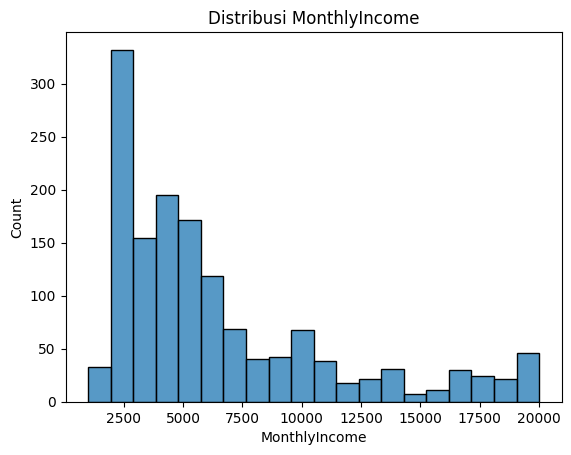

In [ ]:
sns.histplot(data=df, x='MonthlyIncome')
plt.title('Distribusi MonthlyIncome')

Text(0.5, 1.0, 'Distribusi MonthlyRate')

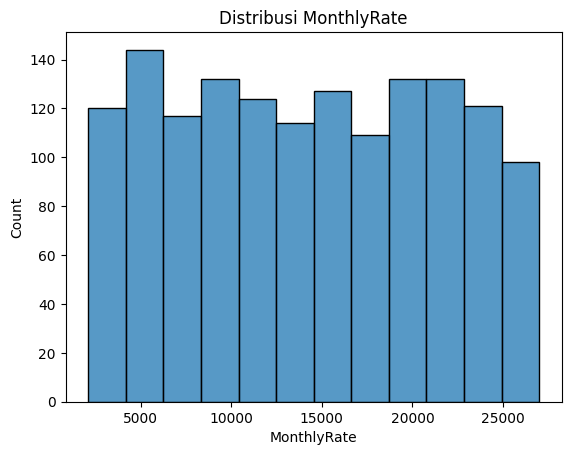

In [ ]:
sns.histplot(data=df, x='MonthlyRate')
plt.title('Distribusi MonthlyRate')

Text(0.5, 1.0, 'Distribusi NumCompaniesWorked')

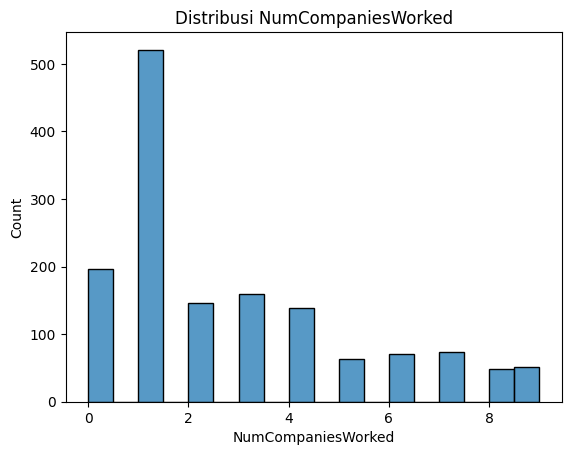

In [ ]:
sns.histplot(data=df, x='NumCompaniesWorked')
plt.title('Distribusi NumCompaniesWorked')

Text(0.5, 1.0, 'Distribusi PercentSalaryHike')

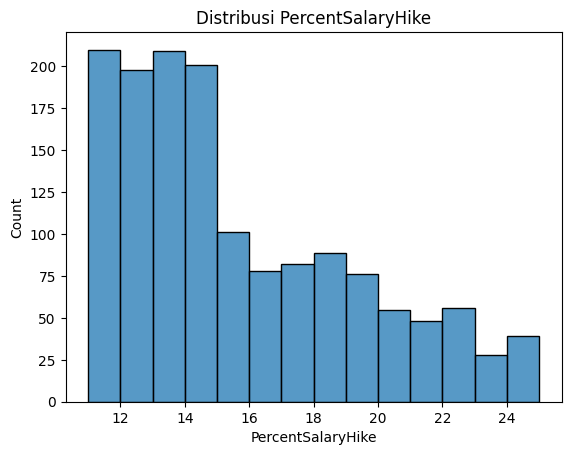

In [ ]:
sns.histplot(data=df, x='PercentSalaryHike')
plt.title('Distribusi PercentSalaryHike')

Text(0.5, 1.0, 'Distribusi PerformanceRating')

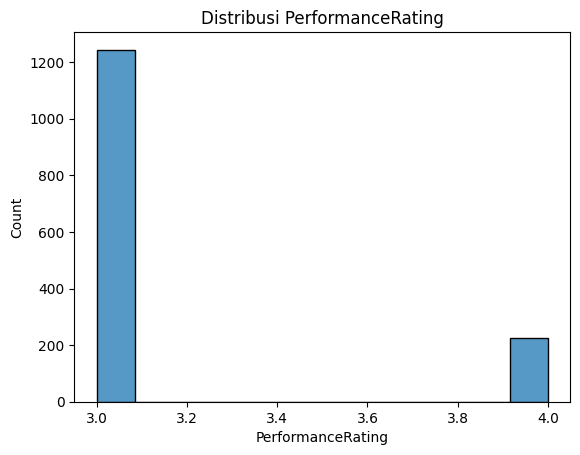

In [ ]:
sns.histplot(data=df, x='PerformanceRating')
plt.title('Distribusi PerformanceRating')

Text(0.5, 1.0, 'Distribusi RelationshipSatisfaction')

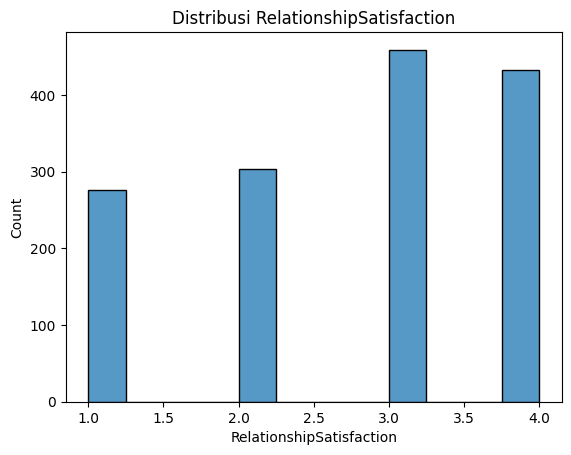

In [ ]:
sns.histplot(data=df, x='RelationshipSatisfaction')
plt.title('Distribusi RelationshipSatisfaction')

Text(0.5, 1.0, 'Distribusi StockOptionLevel')

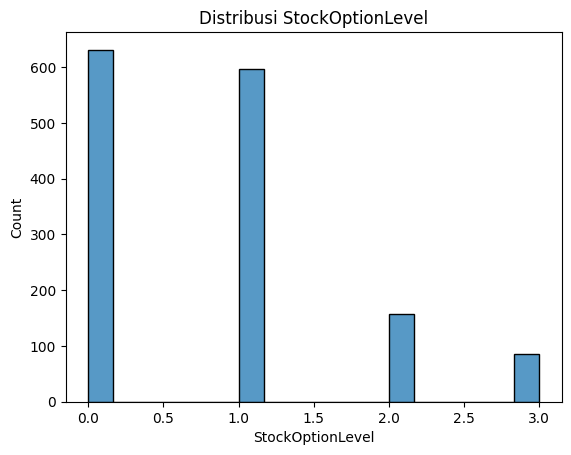

In [ ]:
sns.histplot(data=df, x='StockOptionLevel')
plt.title('Distribusi StockOptionLevel')

Text(0.5, 1.0, 'Distribusi TotalWorkingYears')

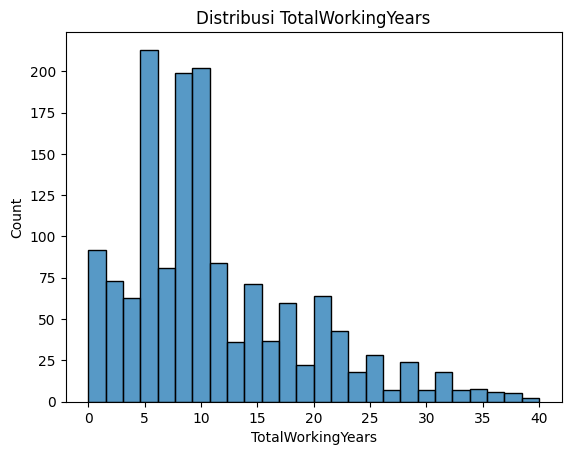

In [ ]:
sns.histplot(data=df, x='TotalWorkingYears')
plt.title('Distribusi TotalWorkingYears')

Text(0.5, 1.0, 'Distribusi TrainingTimesLastYear')

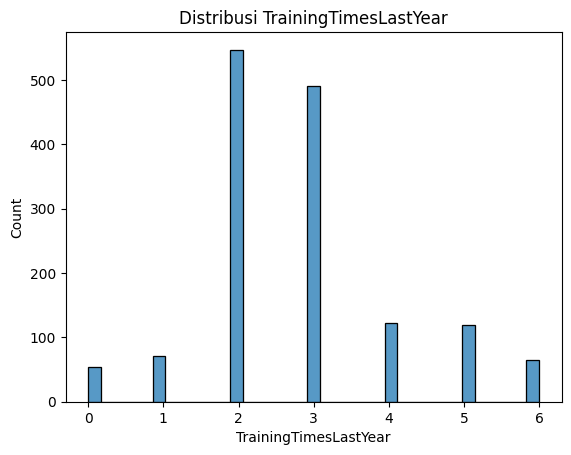

In [ ]:
sns.histplot(data=df, x='TrainingTimesLastYear')
plt.title('Distribusi TrainingTimesLastYear')

Text(0.5, 1.0, 'Distribusi WorkLifeBalance')

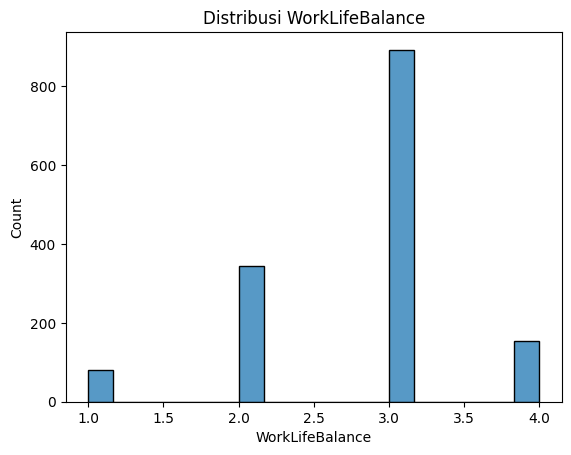

In [ ]:
sns.histplot(data=df, x='WorkLifeBalance')
plt.title('Distribusi WorkLifeBalance')

Text(0.5, 1.0, 'Distribusi YearsAtCompany')

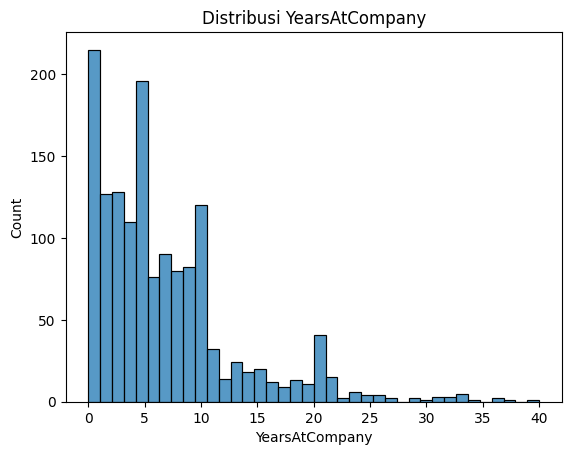

In [ ]:
sns.histplot(data=df, x='YearsAtCompany')
plt.title('Distribusi YearsAtCompany')

Text(0.5, 1.0, 'Distribusi YearsInCurrentRole')

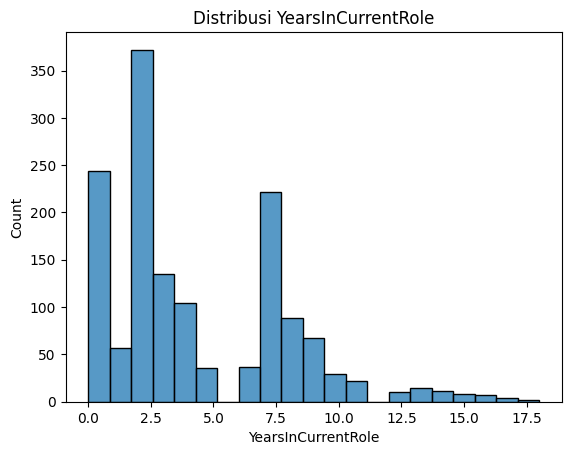

In [ ]:
sns.histplot(data=df, x='YearsInCurrentRole')
plt.title('Distribusi YearsInCurrentRole')

Text(0.5, 1.0, 'Distribusi YearsSinceLastPromotion')

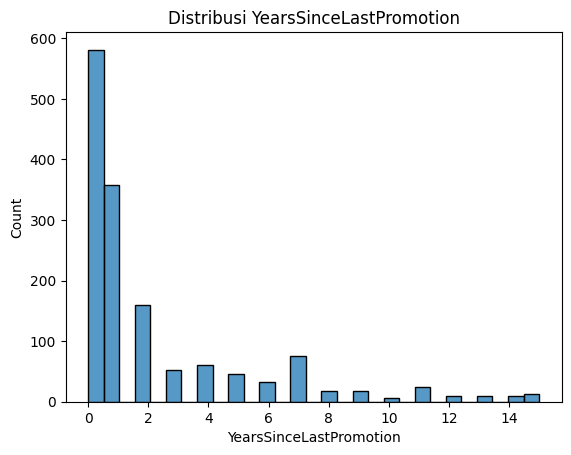

In [ ]:
sns.histplot(data=df, x='YearsSinceLastPromotion')
plt.title('Distribusi YearsSinceLastPromotion')

Text(0.5, 1.0, 'Distribusi YearsWithCurrManager')

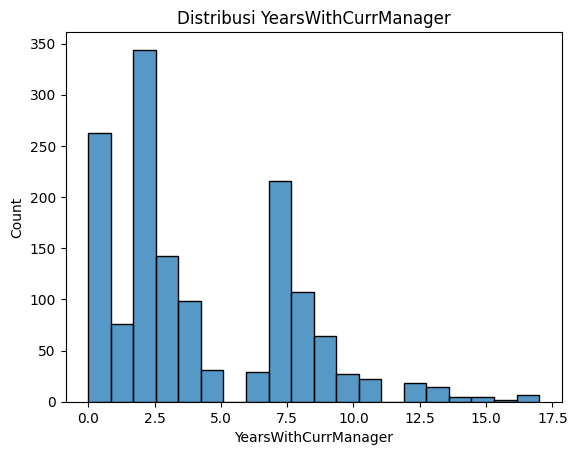

In [ ]:
sns.histplot(data=df, x='YearsWithCurrManager')
plt.title('Distribusi YearsWithCurrManager')

#### Compute Distribution

In [ ]:
# Fungsi untuk compute distribution
def compute_distribution(df, col):
    """
    Utility function to check data distribution for numerical features.

    mean >  median : Positive (Right) Skewed
    mean <  median : Negative (Left) Skewed
    mean == median : Normal

    skew in range (-0.5, 0.5) = approximately symmetrical (Normal distribution)
    skew in range (-1, 1) = moderately skewed
    skew > 1 or skew < -1 = highly skewed

    kurtosis > 3 : Leptokurtic
    kurtosis == 3: Mesokurtic
    kurtosis < 3: Platykurtic

    :param df: pandas dataframe
    :param col: selected numerical feature (string)
    :return: type of distribution (string)
    """
    mean = df[col].mean()
    median = df[col].median()

    skew_score = df[col].skew()
    kurtosis_score = df[col].kurtosis()

    if (skew_score > -0.5) and (skew_score < 0.5):
        skewness = 'Approximately Simetric (Normal Distribution)'
    elif(skew_score > -1) and (skew_score < 1):
        skewness = 'Moderately Skewed'
    else:
        skewness = 'Highly Skewed'

    if kurtosis_score > 3:
        kurtosis_flag = 'Leptokurtic'
    elif kurtosis_score == 3:
        kurtosis_flag = 'Mesokurtic'
    else:
        kurtosis_flag = 'Platykurtic'


    if mean < median:
        print(f'{col} data distribution: Left Skewed Distribution')
        print(f'Skewness Score: {df[col].skew():.2f} [{skewness}]')
        print(f'Kurtosis Score: {df[col].kurtosis():.2f} [{kurtosis_flag}]')

    elif mean > median:

        print(f'{col} data distribution: Right Skewed Distribution')
        print(f'Skewness score: {df[col].skew():.2f} [{skewness}]')
        print(f'Kurtosis score: {df[col].kurtosis():.2f} [{kurtosis_flag}]')

    else:

        print(f'{col} data distribution: Normal Distribution')
        print(f'Skewness score: {df[col].skew():.2f} [{skewness}]')
        print(f'Kurtosis score: {df[col].kurtosis():.2f} [{kurtosis_flag}]')

In [ ]:
for i in range(len(nums)):
    compute_distribution(df, nums[i])

Age data distribution: Right Skewed Distribution
Skewness score: 0.41 [Approximately Simetric (Normal Distribution)]
Kurtosis score: -0.40 [Platykurtic]
DailyRate data distribution: Right Skewed Distribution
Skewness score: -0.00 [Approximately Simetric (Normal Distribution)]
Kurtosis score: -1.20 [Platykurtic]
DistanceFromHome data distribution: Right Skewed Distribution
Skewness score: 0.96 [Moderately Skewed]
Kurtosis score: -0.22 [Platykurtic]
Education data distribution: Left Skewed Distribution
Skewness Score: -0.29 [Approximately Simetric (Normal Distribution)]
Kurtosis Score: -0.56 [Platykurtic]
EnvironmentSatisfaction data distribution: Left Skewed Distribution
Skewness Score: -0.32 [Approximately Simetric (Normal Distribution)]
Kurtosis Score: -1.20 [Platykurtic]
HourlyRate data distribution: Left Skewed Distribution
Skewness Score: -0.03 [Approximately Simetric (Normal Distribution)]
Kurtosis Score: -1.20 [Platykurtic]
JobInvolvement data distribution: Left Skewed Distributi

#### Outlier Handler

In [ ]:
# Fungsi untuk outlier handler
def outlier_handler(df, col):

    """
    Utility function to clean outlier using Tukey Fences Method.
    :param df: Dataframe with outlier (pd.DataFrame)
    :param col: Numerical Feature (String)
    :return: Dataframe without outlier (pd.DataFrame)
    """

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    up_bound = q3 + 1.5*iqr
    low_bound = q1 - 1.5*iqr

    outlier = df[col][(df[col] < low_bound) | (df[col] > up_bound)]

    print(f'Percentage of outliers: {len(outlier)*100/len(df[col]):.2f}%')

    no_outlier = df[(df[col] >= low_bound) & (df[col] <= up_bound)]

    return no_outlier

In [ ]:
df_clean = df.copy()

for i in range(len(nums)):
    print(f'Handling {nums[i]}')
    df_clean = outlier_handler(df_clean, nums[i])

Handling Age
Percentage of outliers: 0.00%
Handling DailyRate
Percentage of outliers: 0.00%
Handling DistanceFromHome
Percentage of outliers: 0.00%
Handling Education
Percentage of outliers: 0.00%
Handling EnvironmentSatisfaction
Percentage of outliers: 0.00%
Handling HourlyRate
Percentage of outliers: 0.00%
Handling JobInvolvement
Percentage of outliers: 0.00%
Handling JobLevel
Percentage of outliers: 0.00%
Handling JobSatisfaction
Percentage of outliers: 0.00%
Handling MonthlyIncome
Percentage of outliers: 7.76%
Handling MonthlyRate
Percentage of outliers: 0.00%
Handling NumCompaniesWorked
Percentage of outliers: 3.47%
Handling PercentSalaryHike
Percentage of outliers: 0.00%
Handling PerformanceRating
Percentage of outliers: 15.89%
Handling RelationshipSatisfaction
Percentage of outliers: 0.00%
Handling StockOptionLevel
Percentage of outliers: 5.90%
Handling TotalWorkingYears
Percentage of outliers: 4.73%
Handling TrainingTimesLastYear
Percentage of outliers: 16.92%
Handling WorkLife

##### histogram (x=nama_kolom, y=count)

Text(0.5, 1.0, 'Age tanpa outlier')

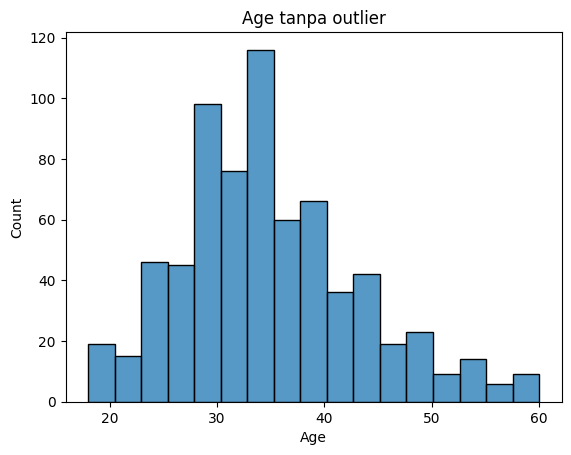

In [ ]:
sns.histplot(data=df_clean, x='Age')
plt.title('Age tanpa outlier')

Text(0.5, 1.0, 'DailyRate tanpa outlier')

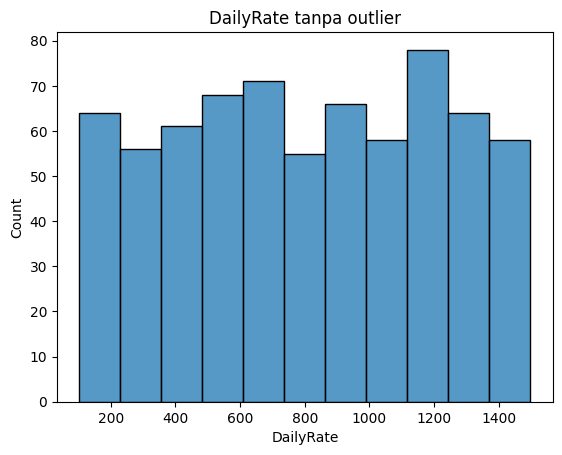

In [ ]:
sns.histplot(data=df_clean, x='DailyRate')
plt.title('DailyRate tanpa outlier')

Text(0.5, 1.0, 'DistanceFromHome tanpa outlier')

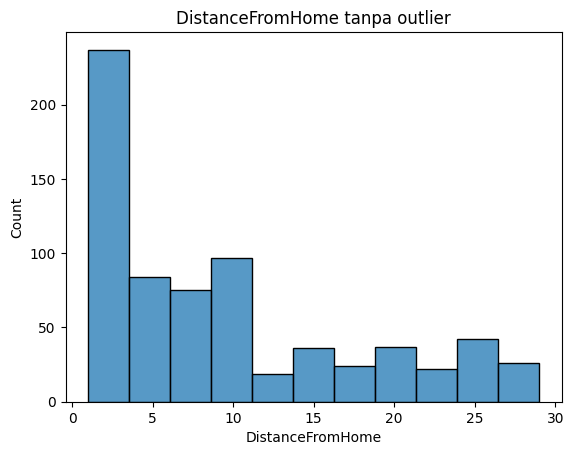

In [ ]:
sns.histplot(data=df_clean, x='DistanceFromHome')
plt.title('DistanceFromHome tanpa outlier')

Text(0.5, 1.0, 'Education tanpa outlier')

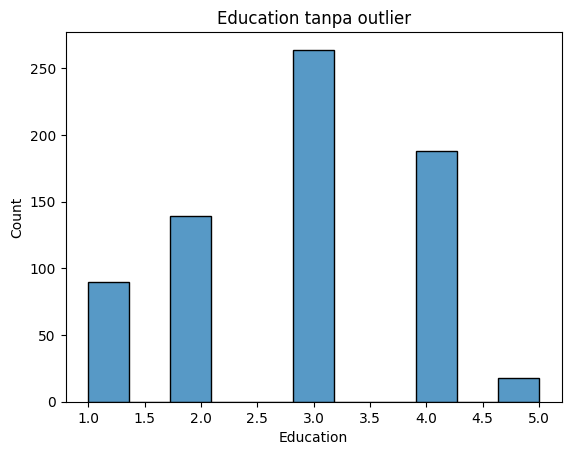

In [ ]:
sns.histplot(data=df_clean, x='Education')
plt.title('Education tanpa outlier')

Text(0.5, 1.0, 'EnvironmentSatisfaction tanpa outlier')

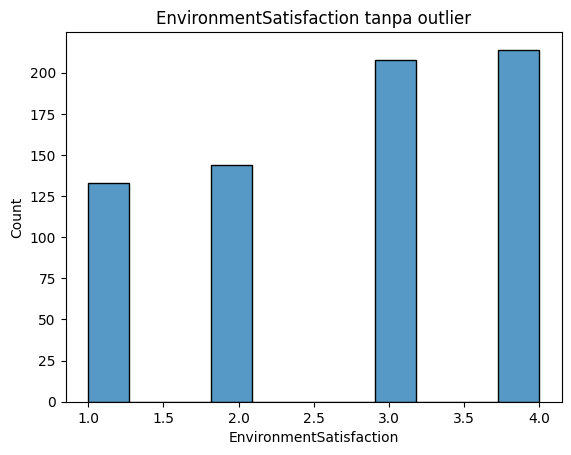

In [ ]:
sns.histplot(data=df_clean, x='EnvironmentSatisfaction')
plt.title('EnvironmentSatisfaction tanpa outlier')

Text(0.5, 1.0, 'HourlyRate tanpa outlier')

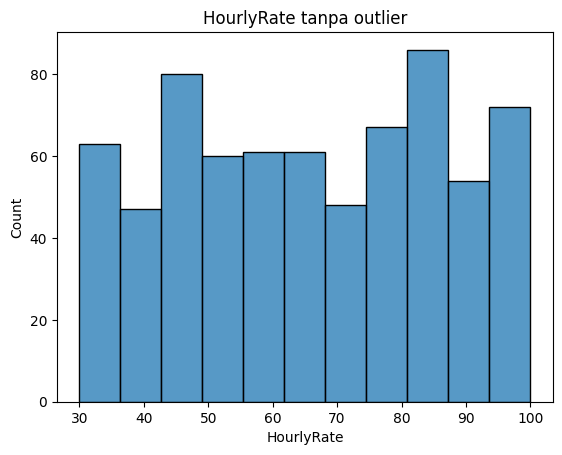

In [ ]:
sns.histplot(data=df_clean, x='HourlyRate')
plt.title('HourlyRate tanpa outlier')

Text(0.5, 1.0, 'JobInvolvement tanpa outlier')

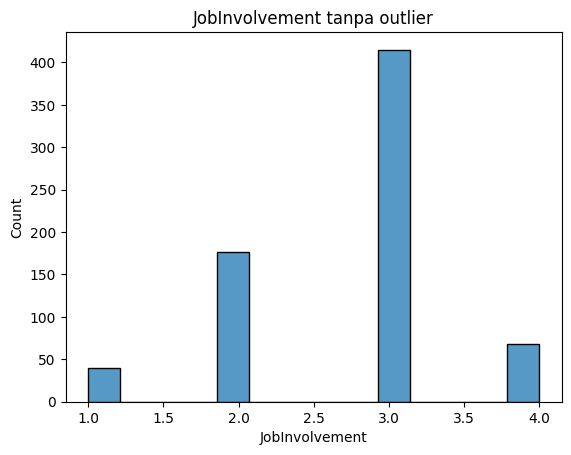

In [ ]:
sns.histplot(data=df_clean, x='JobInvolvement')
plt.title('JobInvolvement tanpa outlier')

Text(0.5, 1.0, 'JobLevel tanpa outlier')

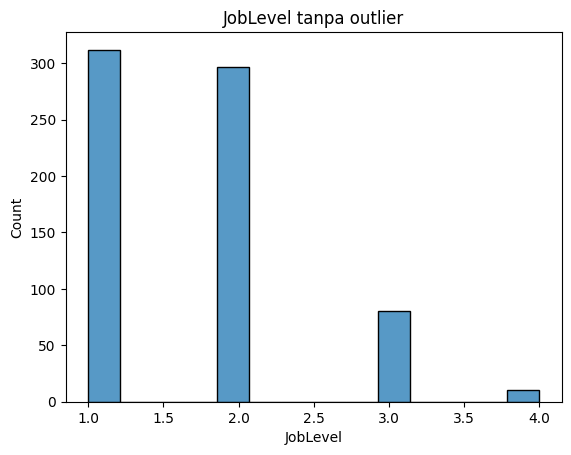

In [ ]:
sns.histplot(data=df_clean, x='JobLevel')
plt.title('JobLevel tanpa outlier')

Text(0.5, 1.0, 'JobSatisfaction tanpa outlier')

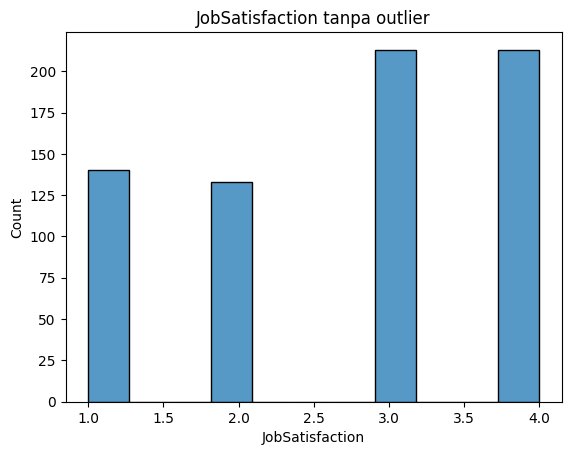

In [ ]:
sns.histplot(data=df_clean, x='JobSatisfaction')
plt.title('JobSatisfaction tanpa outlier')

Text(0.5, 1.0, 'MonthlyIncome tanpa outlier')

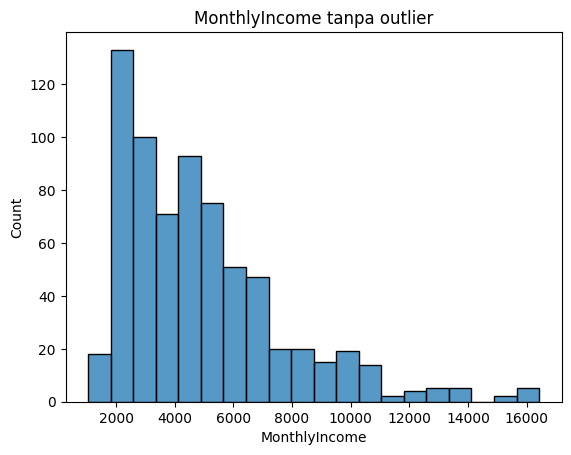

In [ ]:
sns.histplot(data=df_clean, x='MonthlyIncome')
plt.title('MonthlyIncome tanpa outlier')

Text(0.5, 1.0, 'MonthlyRate tanpa outlier')

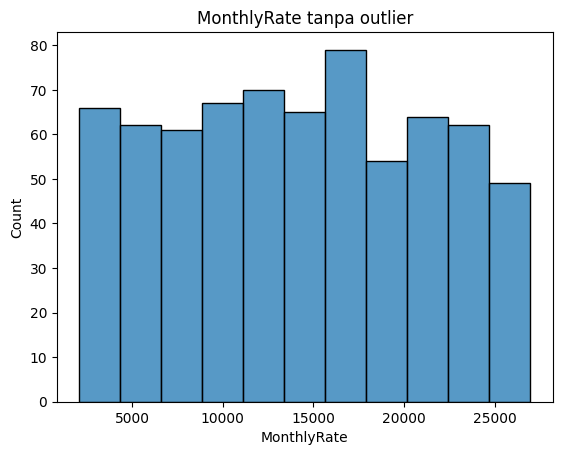

In [ ]:
sns.histplot(data=df_clean, x='MonthlyRate')
plt.title('MonthlyRate tanpa outlier')

Text(0.5, 1.0, 'NumCompaniesWorked tanpa outlier')

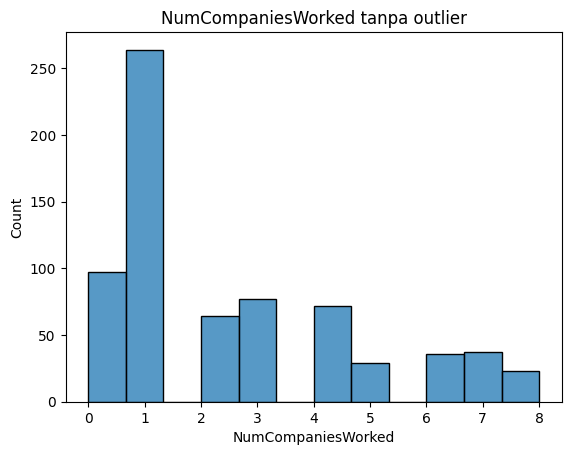

In [ ]:
sns.histplot(data=df_clean, x='NumCompaniesWorked')
plt.title('NumCompaniesWorked tanpa outlier')

Text(0.5, 1.0, 'PercentSalaryHike tanpa outlier')

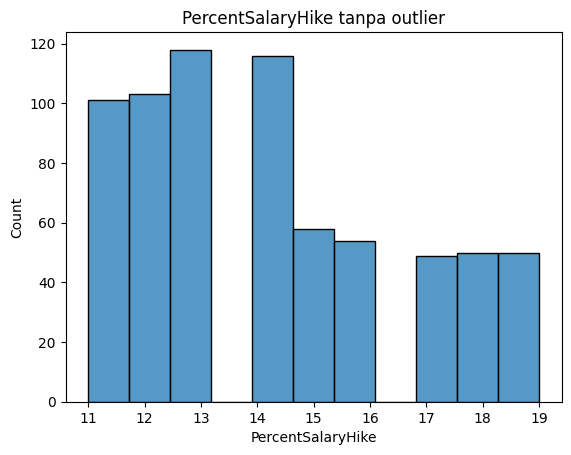

In [ ]:
sns.histplot(data=df_clean, x='PercentSalaryHike')
plt.title('PercentSalaryHike tanpa outlier')

Text(0.5, 1.0, 'PerformanceRating tanpa outlier')

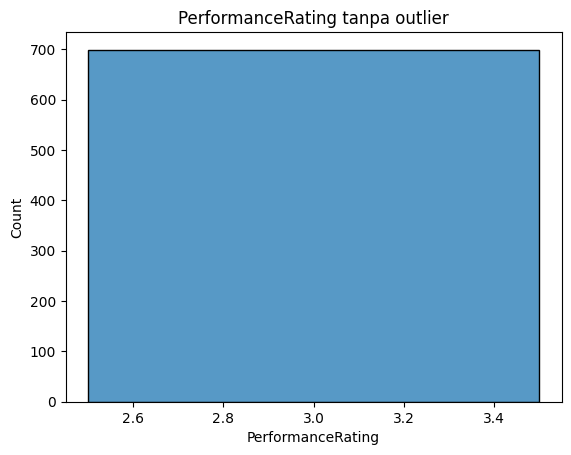

In [ ]:
sns.histplot(data=df_clean, x='PerformanceRating')
plt.title('PerformanceRating tanpa outlier')

Text(0.5, 1.0, 'RelationshipSatisfaction tanpa outlier')

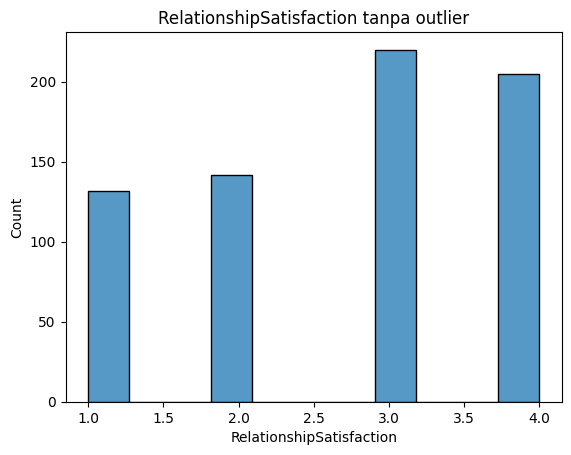

In [ ]:
sns.histplot(data=df_clean, x='RelationshipSatisfaction')
plt.title('RelationshipSatisfaction tanpa outlier')

Text(0.5, 1.0, 'StockOptionLevel tanpa outlier')

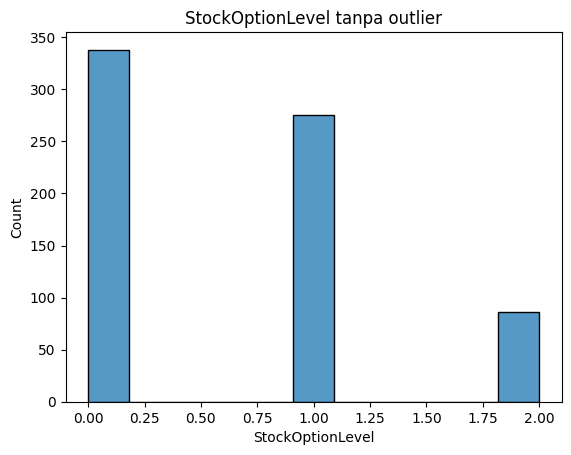

In [ ]:
sns.histplot(data=df_clean, x='StockOptionLevel')
plt.title('StockOptionLevel tanpa outlier')

Text(0.5, 1.0, 'TotalWorkingYears tanpa outlier')

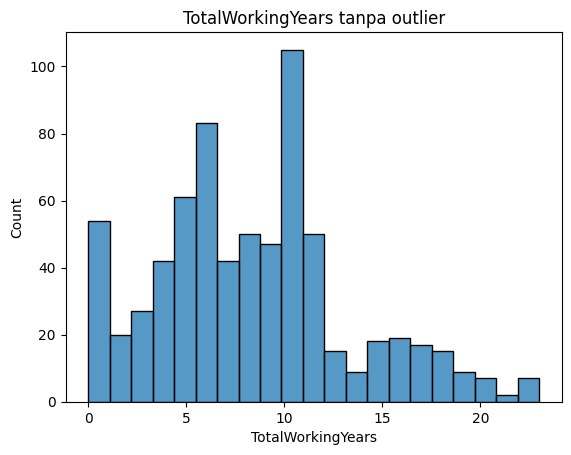

In [ ]:
sns.histplot(data=df_clean, x='TotalWorkingYears')
plt.title('TotalWorkingYears tanpa outlier')

Text(0.5, 1.0, 'TrainingTimesLastYear tanpa outlier')

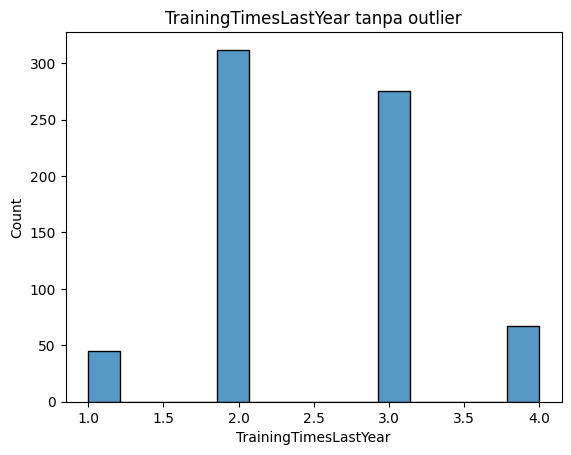

In [ ]:
sns.histplot(data=df_clean, x='TrainingTimesLastYear')
plt.title('TrainingTimesLastYear tanpa outlier')

Text(0.5, 1.0, 'WorkLifeBalance tanpa outlier')

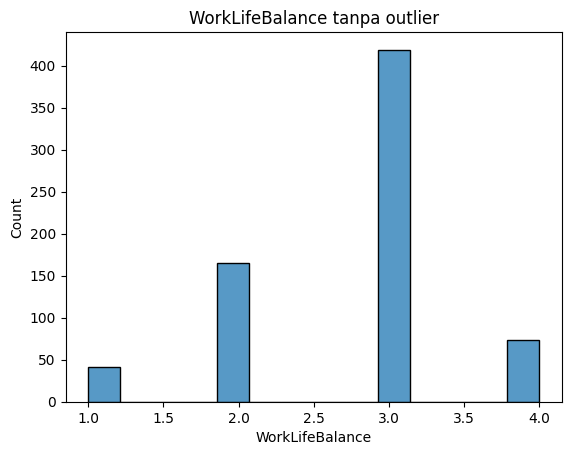

In [ ]:
sns.histplot(data=df_clean, x='WorkLifeBalance')
plt.title('WorkLifeBalance tanpa outlier')

Text(0.5, 1.0, 'YearsAtCompany tanpa outlier')

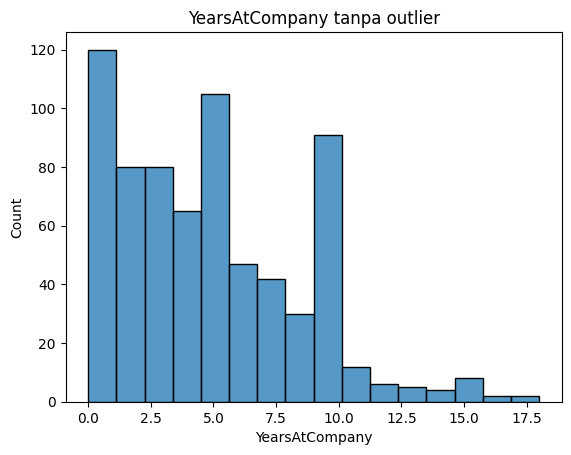

In [ ]:
sns.histplot(data=df_clean, x='YearsAtCompany')
plt.title('YearsAtCompany tanpa outlier')

Text(0.5, 1.0, 'YearsInCurrentRole tanpa outlier')

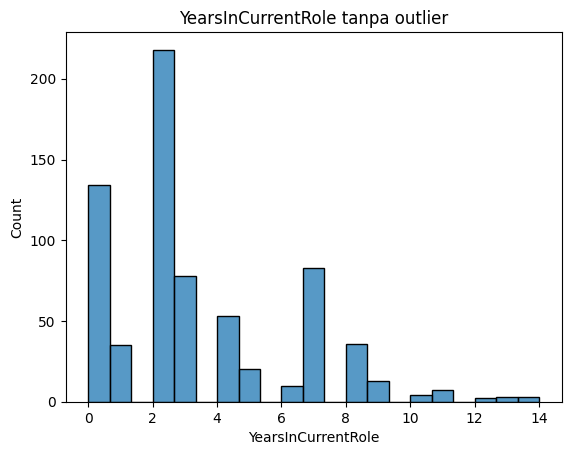

In [ ]:
sns.histplot(data=df_clean, x='YearsInCurrentRole')
plt.title('YearsInCurrentRole tanpa outlier')

Text(0.5, 1.0, 'YearsSinceLastPromotion tanpa outlier')

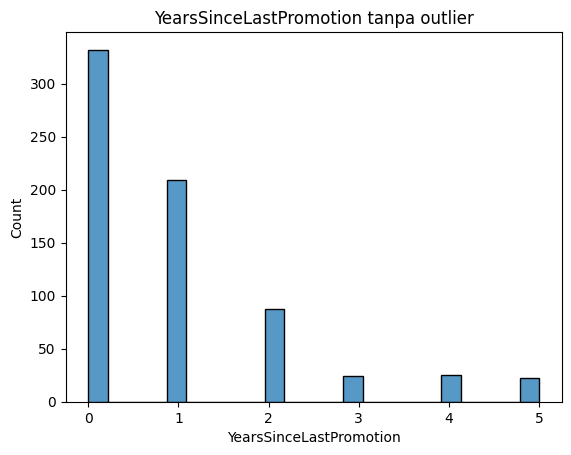

In [ ]:
sns.histplot(data=df_clean, x='YearsSinceLastPromotion')
plt.title('YearsSinceLastPromotion tanpa outlier')

Text(0.5, 1.0, 'YearsWithCurrManager tanpa outlier')

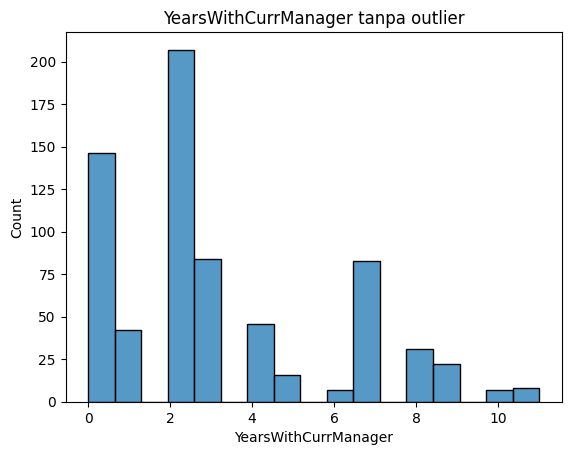

In [ ]:
sns.histplot(data=df_clean, x='YearsWithCurrManager')
plt.title('YearsWithCurrManager tanpa outlier')

##### Distribusi

In [ ]:
for i in range(len(nums)):
    compute_distribution(df_clean, nums[i])

Age data distribution: Right Skewed Distribution
Skewness score: 0.60 [Moderately Skewed]
Kurtosis score: 0.18 [Platykurtic]
DailyRate data distribution: Left Skewed Distribution
Skewness Score: -0.04 [Approximately Simetric (Normal Distribution)]
Kurtosis Score: -1.18 [Platykurtic]
DistanceFromHome data distribution: Right Skewed Distribution
Skewness score: 0.87 [Moderately Skewed]
Kurtosis score: -0.41 [Platykurtic]
Education data distribution: Left Skewed Distribution
Skewness Score: -0.29 [Approximately Simetric (Normal Distribution)]
Kurtosis Score: -0.67 [Platykurtic]
EnvironmentSatisfaction data distribution: Left Skewed Distribution
Skewness Score: -0.30 [Approximately Simetric (Normal Distribution)]
Kurtosis Score: -1.22 [Platykurtic]
HourlyRate data distribution: Left Skewed Distribution
Skewness Score: -0.04 [Approximately Simetric (Normal Distribution)]
Kurtosis Score: -1.22 [Platykurtic]
JobInvolvement data distribution: Left Skewed Distribution
Skewness Score: -0.52 [Mod

#### Boxplot After Outlier Handler

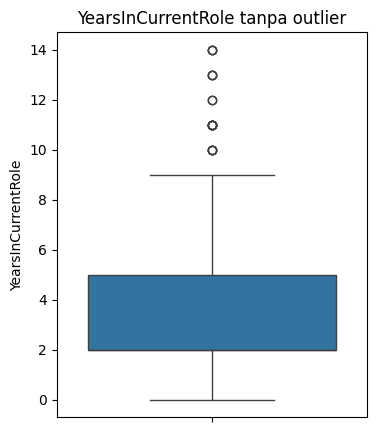

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df_clean['YearsInCurrentRole'])
plt.title('YearsInCurrentRole tanpa outlier')
plt.show()

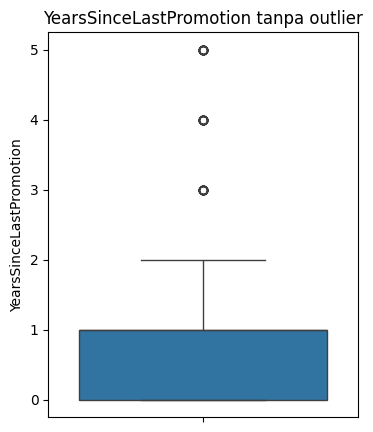

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df_clean['YearsSinceLastPromotion'])
plt.title('YearsSinceLastPromotion tanpa outlier')
plt.show()

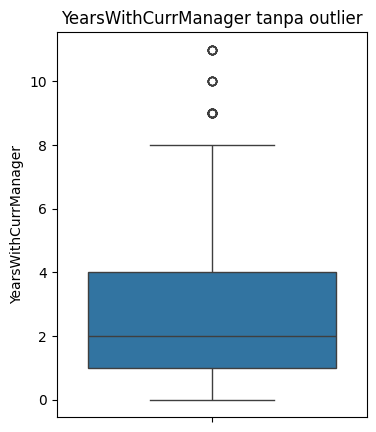

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df_clean['YearsWithCurrManager'])
plt.title('YearsWithCurrManager tanpa outlier')
plt.show()

#### Data Kategorikal

##### Attrition

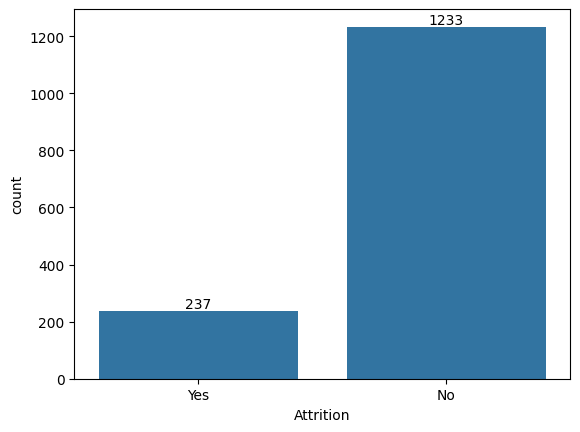

In [ ]:
ax = sns.countplot(data=df, x='Attrition')
for cont in ax.containers:
    ax.bar_label(cont)

##### BusinessTravel

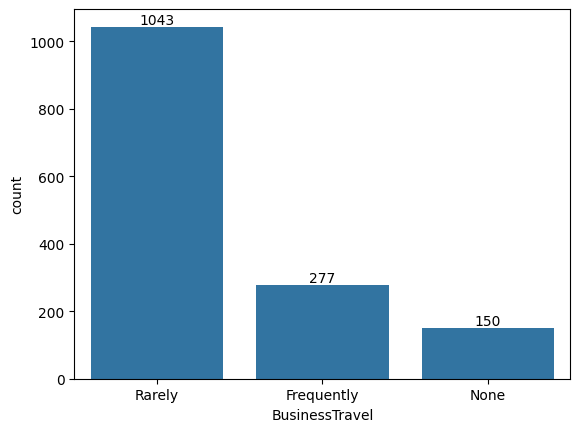

In [ ]:
ax = sns.countplot(data=df, x='BusinessTravel')
for cont in ax.containers:
    ax.bar_label(cont)

##### Department

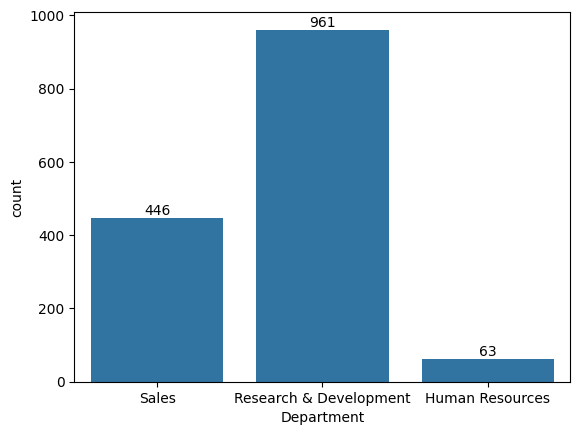

In [ ]:
ax = sns.countplot(data=df, x='Department')
for cont in ax.containers:
    ax.bar_label(cont)

##### EducationField

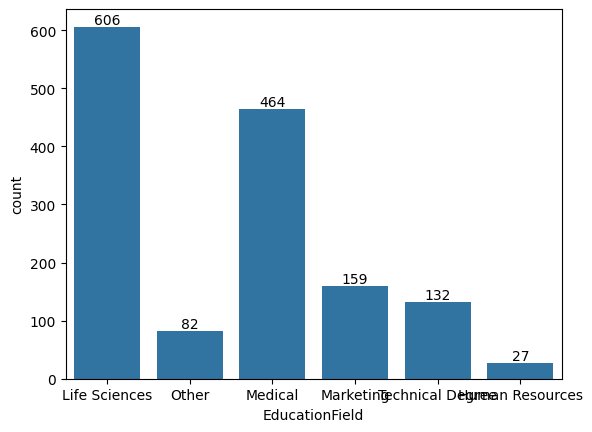

In [ ]:
ax = sns.countplot(data=df, x='EducationField')
for cont in ax.containers:
    ax.bar_label(cont)

##### Gender

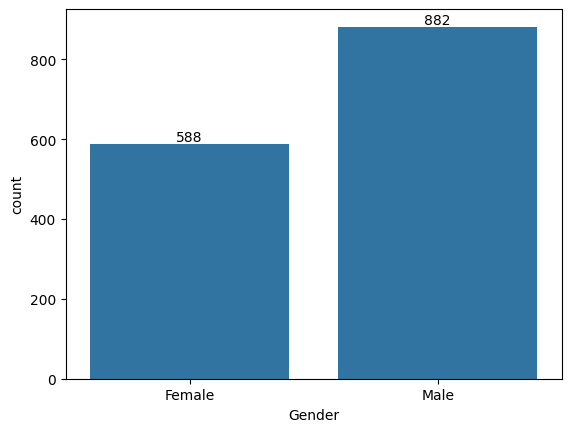

In [ ]:
ax = sns.countplot(data=df, x='Gender')
for cont in ax.containers:
    ax.bar_label(cont)

##### JobRole

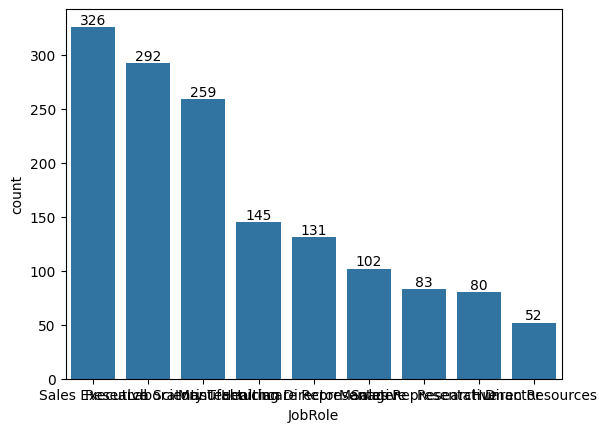

In [ ]:
ax = sns.countplot(data=df, x='JobRole')
for cont in ax.containers:
    ax.bar_label(cont)

##### MaritalStatus

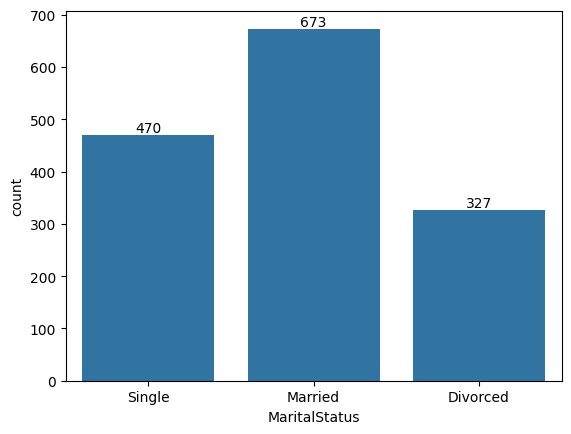

In [ ]:
ax = sns.countplot(data=df, x='MaritalStatus')
for cont in ax.containers:
    ax.bar_label(cont)

##### OverTime

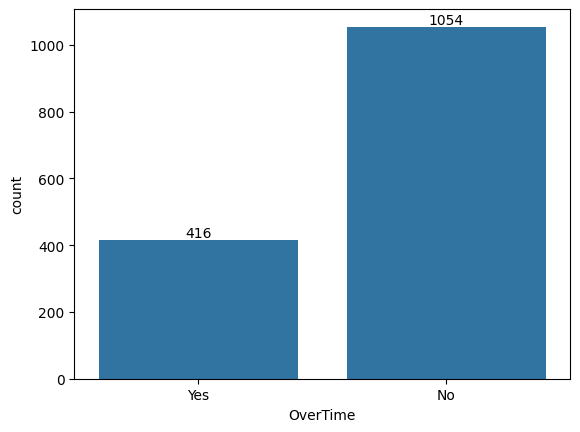

In [ ]:
ax = sns.countplot(data=df, x='OverTime')
for cont in ax.containers:
    ax.bar_label(cont)

## Multivariate Analysis

### Correlation Heatmap

In [ ]:
correlations = df_clean[nums].corr(method='pearson')
correlations = correlations.round(4)

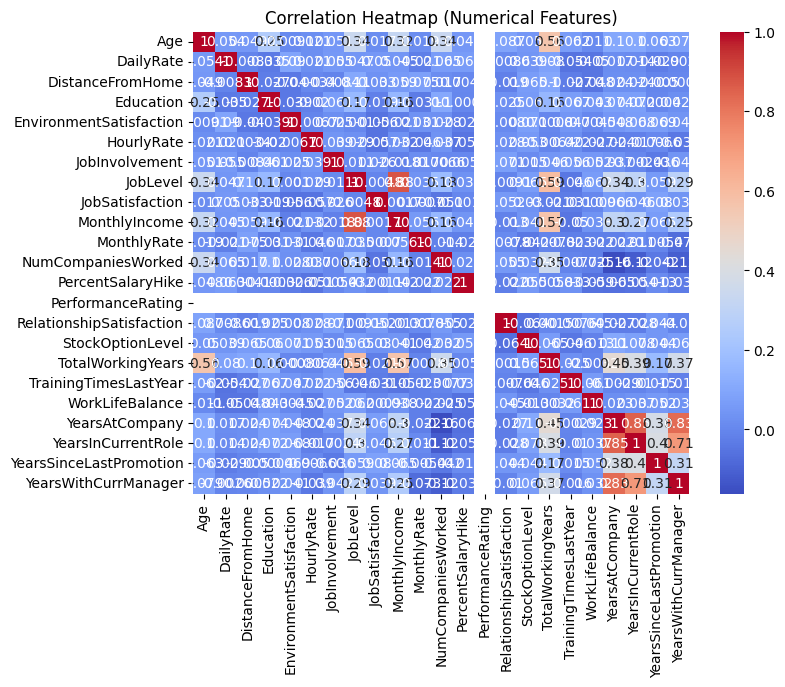

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

## Feature Engineering

In [ ]:
# Mengubah kolom 'Attrition' dari boolean menjadi int
df_clean['Attrition'] = df_clean['Attrition'].map({'Yes': 1, 'No': 0})

# Penghasilan per tahun ketika di perusahaan
df_clean['IncomePerYearAtCompany'] = df_clean['MonthlyIncome'] * 12 / df_clean['YearsAtCompany']
df_clean['IncomePerYearAtCompany'].replace([float('inf'), -float('inf')], 0, inplace=True)

df_clean.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomePerYearAtCompany
2,37,1,Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,0.000000
3,33,0,Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,4363.500000
5,32,0,Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5259.428571
11,29,0,Rarely,153,Research & Development,15,2,Life Sciences,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Yes,12,3,4,0,10,3,3,9,5,0,8,5590.666667
12,31,0,Rarely,670,Research & Development,26,1,Life Sciences,1,Male,31,3,1,Research Scientist,3,Divorced,2911,15170,1,No,17,3,4,1,5,1,2,5,2,4,3,6986.400000


## Feature Selection

In [ ]:
# Mengambil kolom kategorikal
cats = df_clean.select_dtypes(include=['object']).columns.tolist()

# One-hot encoding untuk nilai kategorikal
data_olah = pd.get_dummies(df_clean, columns=cats)

# Tampilkan data
data_olah.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomePerYearAtCompany,BusinessTravel_Frequently,BusinessTravel_None,BusinessTravel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0.000000,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,4363.500000,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True
5,32,0,1005,2,2,4,79,3,1,4,3068,11864,0,13,3,3,0,8,2,2,7,7,3,6,5259.428571,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False
11,29,0,153,15,2,4,49,2,2,3,4193,12682,0,12,3,4,0,10,3,3,9,5,0,8,5590.666667,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True
12,31,0,670,26,1,1,31,3,1,3,2911,15170,1,17,3,4,1,5,1,2,5,2,4,3,6986.400000,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False


## Feature Scaling

In [ ]:
# Import library untuk scaling data
from sklearn.preprocessing import RobustScaler

# Inisialisasi objek RobustScaler
scaler = RobustScaler()

# Fit dan transform data pada dataframe
scaled_data = scaler.fit_transform(data_olah)

# Membuat dataframe baru dengan data yang telah discaling
data_olah = pd.DataFrame(scaled_data, columns=data_olah.columns)

# Mengubah kolom 'Attrition' dari float menjadi int
data_olah['Attrition'] = data_olah['Attrition'].astype(int)

# Tampilkan data
data_olah.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomePerYearAtCompany,BusinessTravel_Frequently,BusinessTravel_None,BusinessTravel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.272727,1,0.814815,-0.384615,-0.5,0.5,0.722222,-1.0,-1.0,0.0,-0.649043,-0.987035,1.666667,0.25,0.0,-0.5,-1.0,-0.2,1.0,0.0,-1.0,-0.666667,-1.0,-0.666667,-0.991829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0
1,-0.090909,0,0.842411,-0.307692,0.5,0.5,-0.277778,0.0,-1.0,0.0,-0.409815,0.760987,0.000000,-0.75,0.0,0.0,-1.0,0.0,1.0,0.0,0.6,1.666667,2.0,-0.666667,-0.620710,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0
2,-0.181818,0,0.280320,-0.384615,-0.5,0.5,0.361111,0.0,-1.0,0.5,-0.363371,-0.189931,-0.333333,-0.25,0.0,0.0,-1.0,0.0,0.0,-1.0,0.4,1.666667,2.0,1.333333,-0.544510,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.454545,0,-0.957153,0.615385,-0.5,0.5,-0.472222,-1.0,0.0,0.0,-0.034760,-0.121064,-0.333333,-0.50,0.0,0.5,-1.0,0.4,1.0,0.0,0.8,1.000000,-1.0,2.000000,-0.516338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0
4,-0.272727,0,-0.206245,1.461538,-1.0,-1.0,-0.972222,0.0,-1.0,0.0,-0.409230,0.088399,0.000000,0.75,0.0,0.5,0.0,-0.6,-1.0,-1.0,0.0,0.000000,3.0,0.333333,-0.397630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Handling Imbalanced Data

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

X = data_olah.drop(['Attrition', 'YearsAtCompany', 'PercentSalaryHike', 'YearsInCurrentRole', 'JobLevel'], axis=1)
y = data_olah['Attrition']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Pada variabel X kolom 'Attrition' didrop karena merupakan target machine learning sedangkan kolom 'YearsAtCompany', 'PercentSalaryHike', 'YearsInCurrentRole', 'JobLevel' juga di drop karena memiliki nilai korelasi yang cukup tinggi

In [ ]:
# Handling imbalance data training
from imblearn.over_sampling import SMOTE

# Check class distribution
print(y_train.value_counts())

# Imbalance data train menggunakan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Check class distribution after oversampling
print(pd.Series(y_res).value_counts())

Attrition
0    399
1     90
Name: count, dtype: int64
Attrition
0    399
1    399
Name: count, dtype: int64


SMOTE (Synthetic Minority Over-sampling Technique) digunakan untuk handling data imbalance karena SMOTE membuat sampel sintetis dari kelas minoritas  dengan cara interpolasi data yang ada, bukan hanya menduplikat. Metode ini juga dapat mengurangi risiko overfitting.

#Modeling


##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler

# Inisialisasi dan training Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_res, y_res)

# Prediksi
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluasi
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Tampilkan hasil
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Recall: 0.59375
F1 Score: 0.4367816091954023
ROC AUC Score: 0.7821278089887641

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85       178
           1       0.35      0.59      0.44        32

    accuracy                           0.77       210
   macro avg       0.63      0.70      0.64       210
weighted avg       0.83      0.77      0.79       210



Recall = 0.62
Artinya: model berhasil menangkap sekitar 62% dari mereka. Ini cukup baik untuk kasus imbalanced data, karena recall adalah metrik penting dalam mendeteksi kasus attrition.

Precision = 0.33
Artinya: Dari semua yang diprediksi sebagai attrition, hanya 33% yang benar-benar attrition. Ini menunjukkan masih cukup banyak false positive.

F1-Score = 0.43
Gabungan precision dan recall. Nilai ini masih rendah, artinya model belum optimal dalam menyeimbangkan keduanya.

langkah selanjutnya yaitu hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Buat pipeline: standard scaler + logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42))
])

# Grid hyperparameter: penalty, C, dan class_weight
param_grid = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'logreg__class_weight': ['balanced']
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Latih GridSearchCV
grid_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
print("Best ROC AUC score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best ROC AUC score: 0.8492492967651195
Best parameters: {'logreg__C': 0.01, 'logreg__class_weight': 'balanced', 'logreg__penalty': 'l2'}


In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluasi
from sklearn.metrics import recall_score, f1_score, roc_auc_score, classification_report
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

Recall: 0.78125
F1 Score: 0.42735042735042733
ROC AUC Score: 0.7889747191011236
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.66      0.78       178
           1       0.29      0.78      0.43        32

    accuracy                           0.68       210
   macro avg       0.62      0.72      0.60       210
weighted avg       0.84      0.68      0.73       210



Setelah melakukan hyperparameter tuning menunjukkan bahwa nilai recall bertambah dari yang sebelumnya 62% menjadi 69% hal tersebut juga terjadi di F1 Score dan ROC_AUC yang artinya hyperparameter tuning mampu untuk meningkatkan performa model logistic regression

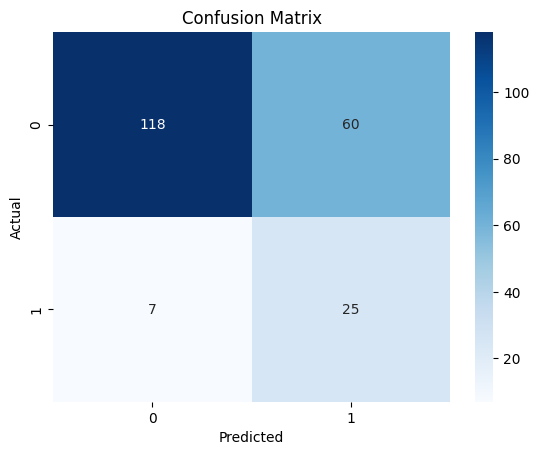

In [ ]:
# Evaluation classification
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model berhasil mengidentifikasi 42 dari 61 karyawan yang benar-benar akan keluar, artinya bisa membantu HR untuk mengantisipasi sekitar 69% dari potensi resign.

Namun, model juga memberi false alarm pada 85 orang (diprediksi keluar tapi ternyata tidak), yang jika ditindaklanjuti bisa menyebabkan sumber daya disalahgunakan untuk mencegah resign yang tidak akan terjadi.

Precision rendah (33%) menandakan banyak prediksi keluar yang ternyata salah — bisa berdampak jika digunakan untuk mengambil keputusan penting seperti insentif atau intervensi khusus.

##XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model XGBoost
xgb_model = XGBClassifier(scale_pos_weight=4.84, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Melatih model menggunakan data hasil SMOTE
xgb_model.fit(X_res, y_res)

# Prediksi terhadap data test
y_pred = xgb_model.predict(X_test)

# Evaluasi model
from sklearn.metrics import recall_score, f1_score, roc_auc_score, classification_report
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

Recall: 0.4375
F1 Score: 0.4444444444444444
ROC AUC Score: 0.7889747191011236
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       178
           1       0.45      0.44      0.44        32

    accuracy                           0.83       210
   macro avg       0.68      0.67      0.67       210
weighted avg       0.83      0.83      0.83       210



Recall = 0.41
Dari seluruh karyawan yang benar-benar keluar, model hanya berhasil menangkap 41%.

Ini artinya, 59% karyawan yang keluar tidak terdeteksi oleh model → bisa jadi masalah jika tujuannya adalah deteksi dini.

F1 Score = 0.476
F1 score mempertimbangkan precision dan recall.

Nilai 0.47 menunjukkan model memiliki keseimbangan yang sedang, tapi masih belum optimal.

ROC AUC Score = 0.80
Ini metrik paling stabil untuk klasifikasi tidak seimbang seperti attrition.

Nilai 0.80 berarti model memiliki kemampuan bagus dalam membedakan antara dua kelas (keluar vs tidak keluar), walaupun threshold default (0.5) mungkin belum ideal.

In [ ]:
from xgboost import XGBClassifier

# Hitung scale_pos_weight
scale_pos = y_train.value_counts()[0] / y_train.value_counts()[1]

# Buat model dengan scale_pos_weight
model = XGBClassifier(
    scale_pos_weight=scale_pos,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Fit model
model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

# Probabilitas prediksi
y_proba = model.predict_proba(X_test)[:, 1]

threshold = 0.05
y_pred_thresh = (y_proba >= threshold).astype(int)

# Evaluasi
from sklearn.metrics import recall_score, f1_score, roc_auc_score, classification_report
print("Recall:", recall_score(y_test, y_pred_thresh))
print("F1 Score:", f1_score(y_test, y_pred_thresh))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))

Recall: 0.6875
F1 Score: 0.4036697247706422
ROC AUC Score: 0.7412219101123595
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.69      0.79       178
           1       0.29      0.69      0.40        32

    accuracy                           0.69       210
   macro avg       0.61      0.69      0.60       210
weighted avg       0.83      0.69      0.73       210



Recall: 67%
Cukup tinggi, artinya mayoritas karyawan yang akan resign berhasil dideteksi oleh model.

Ini penting jika tujuan bisnis adalah pencegahan resign dini — lebih baik sedikit false alarm daripada tidak mendeteksi yang benar-benar resign.

F1 Score: 0.40
Nilai ini menunjukkan masih ada ketidakseimbangan antara precision dan recall.

Kemungkinan besar, precision masih rendah, yaitu:

Banyak prediksi "resign" yang salah (false positives), tapi recall tinggi menyeimbangkan skor F1.

ROC AUC: 0.7789
Skor AUC cukup bagus → model bisa membedakan dua kelas secara menyeluruh, terlepas dari threshold.



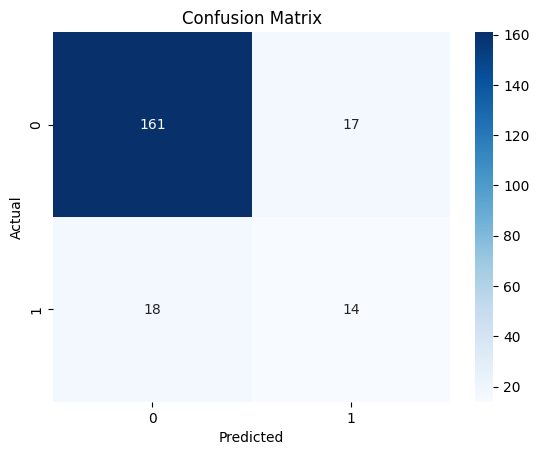

In [ ]:
# Evaluation classification
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

TN sangat tinggi (361) → Model jarang salah memprediksi karyawan yang loyal

Precision cukup baik (~57%) → Dari yang diprediksi resign, lebih dari setengahnya memang resign

False positives (19) relatif sedikit → Tidak terlalu banyak “false alarm”


Model cukup akurat dan tidak terlalu agresif dalam memprediksi resign.

Cocok untuk skenario yang mengutamakan akurasi keseluruhan, tapi kurang cocok jika fokus utama adalah menangkap semua yang akan resign.



##AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score, recall_score

# Base estimator
base_model = DecisionTreeClassifier(max_depth=1)

# Inisialisasi AdaBoost (versi scikit-learn terbaru)
adaboost = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

adaboost.fit(X_res, y_res)

# Prediksi & evaluasi
y_pred = adaboost.predict(X_test)
y_proba = adaboost.predict_proba(X_test)[:, 1]

recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))

Recall: 0.5625
F1 Score: 0.5714285714285714
ROC AUC Score: 0.7703651685393259
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       178
           1       0.58      0.56      0.57        32

    accuracy                           0.87       210
   macro avg       0.75      0.74      0.75       210
weighted avg       0.87      0.87      0.87       210



Recall: 42.6%
Dari seluruh karyawan yang keluar, hanya sekitar 43% berhasil terdeteksi.

Artinya model masih melewatkan lebih dari setengah karyawan yang keluar (false negative cukup banyak).

Namun, ini lebih baik dari model yang hanya menebak berdasarkan mayoritas kelas.

F1 Score: 0.46
Ini menunjukkan bahwa model memiliki keseimbangan cukup baik antara precision dan recall, tapi belum optimal.

Masih ada ruang untuk peningkatan terutama pada salah satu dari precision atau recall.

ROC AUC: 0.78
Nilai ini cukup bagus dan berarti model cukup mampu membedakan dua kelas (keluar vs tidak keluar).

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier(max_depth=1)

# Inisialisasi AdaBoost
adaboost = AdaBoostClassifier(estimator=base_model, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}
grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_res, y_res)
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)
# Gunakan model terbaik
best_model = grid_search.best_estimator_

# Prediksi & evaluasi
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, recall_score, f1_score, roc_auc_score

print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Best ROC AUC: 0.889873417721519
Recall: 0.53125
F1 Score: 0.4722222222222222
ROC AUC Score: 0.7449087078651686
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       178
           1       0.42      0.53      0.47        32

    accuracy                           0.82       210
   macro avg       0.67      0.70      0.68       210
weighted avg       0.84      0.82      0.83       210



Best ROC AUC: 0.86
Saat tuning (misalnya via cross-validation atau GridSearch), model menunjukkan kualitas klasifikasi yang sangat baik.

Ini mengindikasikan model bisa “belajar” pola secara efektif dari data training.

ROC AUC Score (Final Test): 0.80
Performa di test set juga konsisten dan cukup tinggi.

Model mampu membedakan karyawan resign dan tidak resign dengan baik → indikator model tidak overfitting.

Recall: 52.5%
Berarti dari seluruh karyawan yang resign, model berhasil mendeteksi lebih dari separuhnya.

Lebih baik dari baseline atau model sebelumnya (sebelum tuning recall hanya 42.6%).

F1 Score: 0.51
Ini menunjukkan keseimbangan antara recall dan precision cukup baik.

Cocok untuk situasi di mana kita ingin menangkap resign sebanyak mungkin tanpa terlalu banyak false positive.

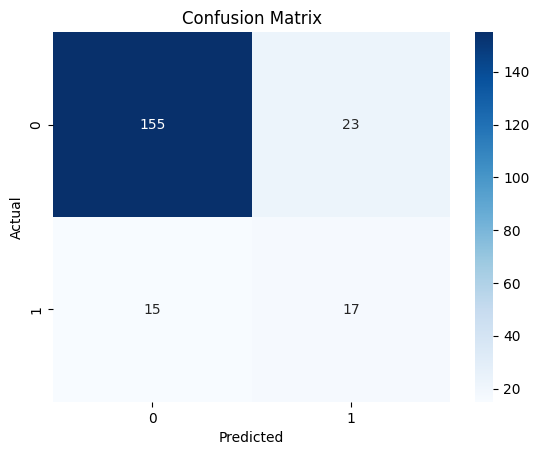

In [ ]:
# Evaluation classification
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

True Negatives (347) tinggi → model sangat andal dalam mengidentifikasi karyawan yang tidak resign.

Recall (52.5%) meningkat → model mendeteksi lebih dari separuh yang resign → bagus untuk pencegahan.

F1 score cukup stabil (≈ 0.51) → model seimbang antara menghindari kesalahan dan deteksi

Model AdaBoost sudah cukup kuat dan seimbang:

ROC AUC ≈ 0.80 → baik secara keseluruhan.

Recall dan F1 meningkat dibanding sebelum tuning.

Siap digunakan dalam produksi terbatas atau uji coba HR, terutama untuk deteksi dini karyawan berisiko tinggi resign.

##LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report, recall_score, f1_score, roc_auc_score
# Inisialisasi model LightGBM (klasifikasi biner)
lgbm_model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    n_estimators=100,
    learning_rate=0.1,
    class_weight='balanced',
    random_state=42
)


lgbm_model.fit(X_res, y_res)
# Prediksi kelas
y_pred = lgbm_model.predict(X_test)

# Prediksi probabilitas (untuk ROC AUC)
y_proba = lgbm_model.predict_proba(X_test)[:, 1]

# Evaluasi
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 399, number of negative: 399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 798, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

Recall (27.9%)
Artinya: dari semua karyawan yang benar-benar keluar, hanya sekitar 28% berhasil terdeteksi oleh model.

72% karyawan keluar tidak terdeteksi (false negatives tinggi) → berisiko untuk use case pencegahan keluar.

F1 Score (0.38)
F1 menggabungkan precision dan recall → rendah, menandakan ketidakseimbangan dan performa buruk di kelas minoritas (keluar).

Kemungkinan besar precision lumayan, tapi recall yang rendah menurunkan F1.

ROC AUC (0.78)
Ini satu-satunya metrik yang cukup baik → artinya secara umum LightGBM memahami pola antara dua kelas, tapi threshold default 0.5 belum optimal untuk mendeteksi kelas keluar.

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, recall_score, f1_score, classification_report
lgbm = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63]
}
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit pada data training (bukan data test!)
grid_search.fit(X_res, y_res)
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)
best_model = grid_search.best_estimator_

# Prediksi
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluasi
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 399, number of negative: 399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 798, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

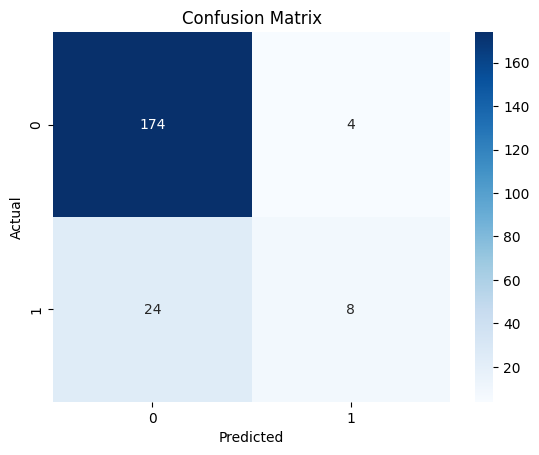

In [ ]:
# Evaluation classification
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Akurasi tinggi (85.5%), terutama karena model sangat baik dalam mengenali karyawan yang tidak keluar (TN = 359).

Precision 43% → jika model memprediksi seseorang akan keluar, ada peluang 43% dia benar-benar keluar → tidak terlalu buruk.

LightGBM memiliki akurasi tinggi, tapi itu karena data tidak seimbang (mayoritas tidak resign).

Performa pada kelas minoritas (resign) masih rendah → recall dan F1 harus ditingkatkan agar model berguna untuk HR.

Belum ideal untuk use case deteksi resign yang proaktif.

##CatBoost

In [ ]:
# Inisialisasi dan Latih Model CatBoost
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    verbose=0,
    auto_class_weights='Balanced'
)
model.fit(X_res, y_res)

# Prediksi
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluasi
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

Recall: 0.375
F1 Score: 0.4444444444444444
ROC AUC Score: 0.751755617977528
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       178
           1       0.55      0.38      0.44        32

    accuracy                           0.86       210
   macro avg       0.72      0.66      0.68       210
weighted avg       0.84      0.86      0.85       210



Recall = 31.1%
Artinya: dari semua karyawan yang keluar, hanya sekitar 1 dari 3 yang berhasil dideteksi oleh model.

False negatives tinggi → Banyak karyawan keluar tidak terdeteksi.

Ini kurang ideal untuk deteksi dini, karena banyak yang keluar tidak tertangkap.

F1 Score = 0.43
Menggabungkan precision dan recall → cukup rendah.

Mungkin precision agak tinggi, tapi recall rendah membuat F1 tidak optimal.

Artinya model belum cukup seimbang untuk menangani kelas minoritas (keluar).

ROC AUC Score = 0.803
Ini adalah satu-satunya metrik yang kuat.

Artinya model mampu memahami pola dua kelas dengan baik saat diberi probabilitas.


In [ ]:
# Import library
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Inisialisasi model dasar
cat_model = CatBoostClassifier(
    verbose=0,
    auto_class_weights='Balanced',
    random_seed=42
)

# Definisikan parameter grid
param_grid = {
    'iterations': [200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_res, y_res)

# Tampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

# Evaluasi model terbaik di test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'depth': 8, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.01}
Best ROC AUC Score: 0.9197994987468672
Recall: 0.3125
F1 Score: 0.36363636363636365
ROC AUC Score: 0.7340238764044943
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       178
           1       0.43      0.31      0.36        32

    accuracy                           0.83       210
   macro avg       0.66      0.62      0.63       210
weighted avg       0.81      0.83      0.82       210



ROC AUC Score (0.7797)

Ini adalah metrik yang menunjukkan seberapa baik model dapat membedakan antara dua kelas (Attrition = Yes vs No).

Skor 0.77 berarti model cukup baik dalam membedakan karyawan yang akan keluar dan yang akan bertahan. Semakin mendekati 1.0, semakin baik.

Namun, perbedaan antara Best ROC AUC (0.865) dan hasil aktual (0.7797) menunjukkan ada overfitting ringan — model bekerja lebih baik di data training/validasi daripada data test.

Recall Rendah (0.3115)

Dari semua karyawan yang benar-benar keluar, hanya 31% berhasil dikenali oleh model.

Ini cukup rendah untuk kasus bisnis seperti prediksi resign, karena bisa menyebabkan perusahaan gagal mendeteksi mayoritas karyawan yang akan keluar.

F1 Score Rendah (0.4130)

F1 Score adalah harmonic mean dari precision dan recall — memberikan gambaran keseimbangan antara dua metrik itu.

Skor ~0.41 mengindikasikan model masih belum optimal dalam menangani kelas minoritas (keluar).

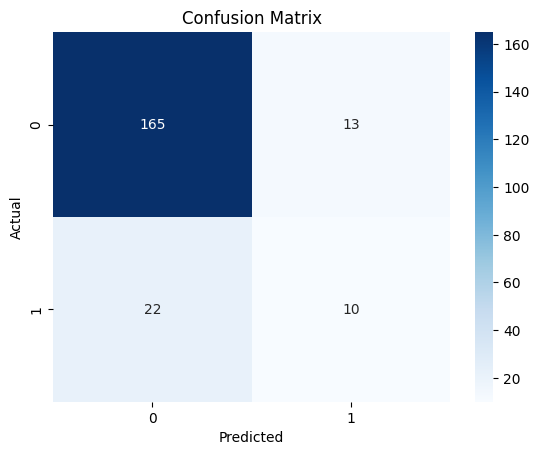

In [ ]:
# Evaluation classification
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

True Negative (368) sangat tinggi → model sangat andal dalam mengenali karyawan yang tidak keluar.

Precision cukup tinggi (~61%) → dari prediksi yang menyatakan "keluar", mayoritas benar-benar keluar.

Akurasi tinggi (87%) dan ROC AUC > 0.8 menunjukkan model mampu membedakan kedua kelas secara keseluruhan.

CatBoost cukup kuat secara umum (AUC > 0.8), namun saat threshold default:

Precision tinggi, tapi

Recall terlalu rendah untuk deteksi resign dini

##Support Vector Machine (SVM)

In [ ]:
# ModelSVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_res, y_res)

# Prediksi
y_pred = svm.predict(X_test)
y_proba = svm.predict_proba(X_test)[:, 1]

# Evaluasi
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred)

# Print hasil
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", report)

Recall: 0.4375
F1 Score: 0.39436619718309857
ROC AUC Score: 0.7501755617977528

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       178
           1       0.36      0.44      0.39        32

    accuracy                           0.80       210
   macro avg       0.63      0.65      0.64       210
weighted avg       0.81      0.80      0.80       210



In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# Inisialisasi model
svm = SVC(probability=True, random_state=42)

# Grid Search dengan cross-validation
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit ke data training
grid_search.fit(X_res, y_res)

# Cetak parameter terbaik dan skor validasi terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score (CV):", grid_search.best_score_)

# Gunakan model terbaik untuk prediksi di test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluasi di test set
from sklearn.metrics import recall_score, f1_score, roc_auc_score, classification_report

recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred)

# Print hasil evaluasi
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", report)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Best ROC AUC Score (CV): 0.9924683544303796
Recall: 0.28125
F1 Score: 0.25
ROC AUC Score: 0.686622191011236

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       178
           1       0.23      0.28      0.25        32

    accuracy                           0.74       210
   macro avg       0.54      0.55      0.55       210
weighted avg       0.77      0.74      0.75       210



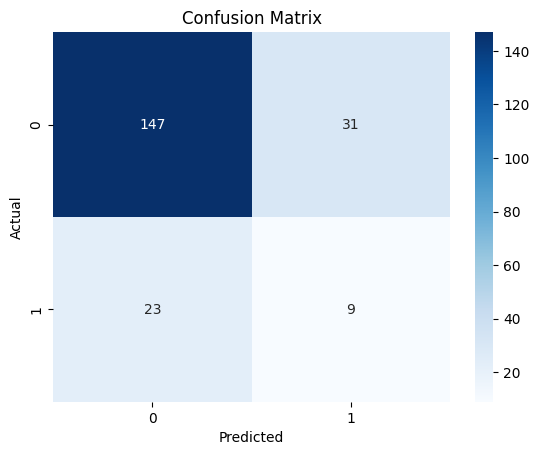

In [ ]:
# Evaluation classification
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, f1_score, roc_auc_score, classification_report

# Inisialisasi dan latih model
nb_model = GaussianNB()
nb_model.fit(X_res, y_res)

# Prediksi pada data test
y_pred = nb_model.predict(X_test)
y_proba = nb_model.predict_proba(X_test)[:, 1]

# Evaluasi model
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred)

# Cetak hasil
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", report)

Recall: 0.875
F1 Score: 0.28865979381443296
ROC AUC Score: 0.721558988764045

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.25      0.39       178
           1       0.17      0.88      0.29        32

    accuracy                           0.34       210
   macro avg       0.54      0.56      0.34       210
weighted avg       0.80      0.34      0.37       210



##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, f1_score, roc_auc_score, classification_report

# 1. Inisialisasi dan latih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_res, y_res)

# 2. Prediksi pada test set
y_pred = dt_model.predict(X_test)
y_proba = dt_model.predict_proba(X_test)[:, 1]

# 3. Evaluasi
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred)

# 4. Cetak hasil
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", report)

Recall: 0.375
F1 Score: 0.3287671232876712
ROC AUC Score: 0.6060393258426966

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       178
           1       0.29      0.38      0.33        32

    accuracy                           0.77       210
   macro avg       0.59      0.61      0.59       210
weighted avg       0.79      0.77      0.78       210



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring='recall',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_res, y_res)

# Evaluasi best model
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
y_proba = best_dt.predict_proba(X_test)[:, 1]

recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", report)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Recall: 0.3125
F1 Score: 0.3333333333333333
ROC AUC Score: 0.6151685393258427

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       178
           1       0.36      0.31      0.33        32

    accuracy                           0.81       210
   macro avg       0.62      0.61      0.61       210
weighted avg       0.80      0.81      0.80       210



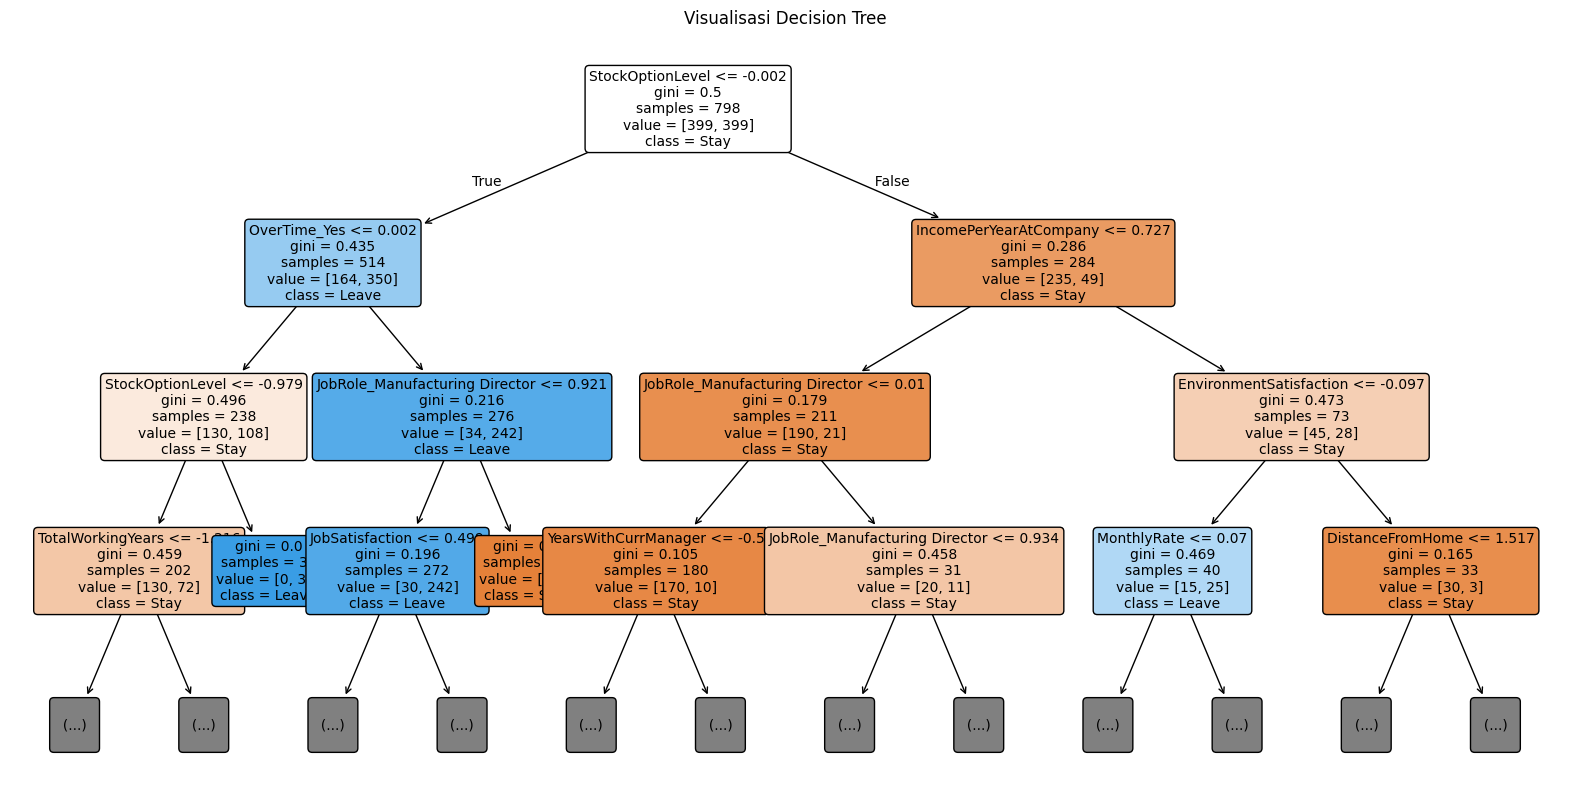

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,  # atau best_dt jika kamu pakai hasil GridSearch
    feature_names=X.columns,
    class_names=["Stay", "Leave"],
    filled=True,
    max_depth=3,
    rounded=True,
    fontsize=10
)
plt.title("Visualisasi Decision Tree")
plt.show()


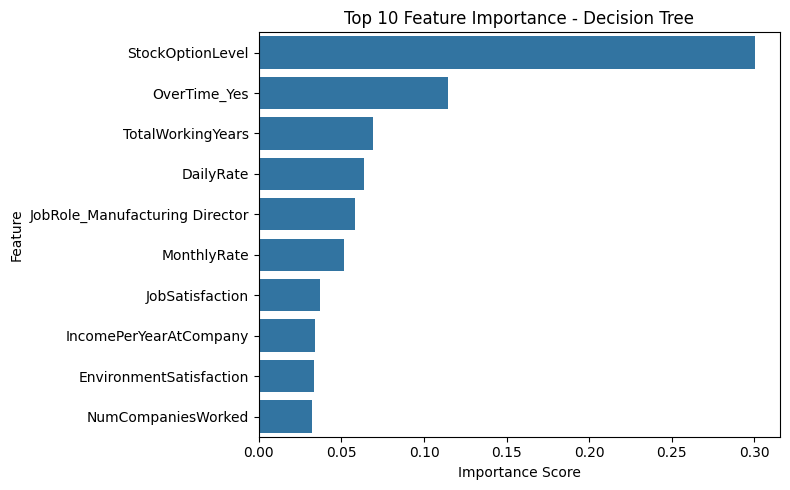

In [ ]:
import pandas as pd
import seaborn as sns

# Ambil feature importance
importance = pd.Series(dt_model.feature_importances_, index=X.columns)

# Urutkan dan tampilkan 10 teratas
top_features = importance.sort_values(ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Business Problem, Metrics, dan Target

**Problem:**
Perusahaan mengalami tingkat attrition (keluar/mundur) karyawan yang cukup tinggi, yang dapat berdampak pada biaya rekrutmen, pelatihan, dan penurunan produktivitas. Diperlukan analisis untuk memahami pola attrition dan faktor-faktor yang mempengaruhinya agar perusahaan dapat mengambil langkah preventif.

**Business Metrics yang Ingin Ditingkatkan:**
- Menurunkan Attrition Rate (persentase karyawan keluar)
- Meningkatkan rata-rata masa kerja karyawan (Years at Company)
- Menjaga/mengoptimalkan rata-rata gaji karyawan (Monthly Income) agar tetap kompetitif namun efisien
- Menurunkan attrition rate pada departemen, job role, atau gender tertentu yang memiliki tingkat keluar tinggi

**Target:**
- Menurunkan attrition rate tahunan hingga di bawah 10%
- Meningkatkan rata-rata masa kerja karyawan menjadi di atas 5 tahun
- Mengidentifikasi dan menurunkan attrition rate pada departemen/job role/gender dengan risiko tertinggi minimal 20% dari baseline saat ini